Data analysis

In [1]:

# from envs.filtr_json_from_race import load_from_db
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def load_data_from_db():
    
    """
    Load data so that each race is a separate sequence:
    X = [ [state1_race1, state2_race1, ...], [state1_race2, ...] ]
    Y = [ [next1_race1, next2_race1, ...], ... ]
    """
    conn = sqlite3.connect(
        "E:/pracadyp/Race-optimization-reinforcement-learning/data/db_states_for_regress/race_data_states.db"
    )
    cursor = conn.cursor()
    cursor.execute("SELECT race_id, states_json FROM races ORDER BY race_id")
    rows = cursor.fetchall()
    conn.close()


    data = []

    for race_id, states_json in rows:
        states = json.loads(states_json)
        data.append(states)
    
    return data

In [3]:
def make_plots(data):
        history_array = np.array(data)
        
        # Utworzenie większej figury dla wszystkich wykresów
        fig = plt.figure(figsize=(20, 15))
        
        # 1. Lap Distance
        plt.subplot(6, 7, 1)
        plt.plot(history_array[:, 0], label='Lap Distance', color='blue')
        plt.title('Lap Distance')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # 2. Fuel Tank Capacity
        plt.subplot(6, 7, 2)
        plt.plot(history_array[:, 1], label='Fuel', color='green')
        plt.title('Fuel Tank Capacity')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        plt.subplot(6, 7, 3)
        plt.plot(history_array[:, 2], label='Path Wetness', color='purple')
        plt.title('Path Wetness')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)


        # 3-6. Wheel Wear (all 4 wheels)
        plt.subplot(6, 7, 4)
        plt.plot(history_array[:, 3], label='Wheel 1')
        plt.plot(history_array[:, 4], label='Wheel 2')
        plt.plot(history_array[:, 5], label='Wheel 3')
        plt.plot(history_array[:, 6], label='Wheel 4')
        plt.title('Wheel Wear')
        plt.xlabel('Time Steps')
        plt.ylabel('Wear')
        plt.legend()
        plt.grid(True)


        
        plt.subplot(6, 7, 5)
        plt.plot(history_array[:, 7], label='Step Ratio', color='orange')
        plt.title('Current Step Ratio')
        plt.xlabel('Time Steps')
        plt.ylabel('Ratio')
        plt.legend()
        plt.grid(True)

         # 13. Refueled Amount
        plt.subplot(6, 7, 6)
        plt.plot(history_array[:, 8], label='Refueled Amount', color='orange')
        plt.title('Refueled Amount')
        plt.xlabel('Time Steps')
        plt.ylabel('liters')
        plt.legend()
        plt.grid(True)

        # 16. Raining
        plt.subplot(6, 7, 7)
        plt.plot(history_array[:, 9], label='Raining', color='skyblue')
        plt.title('Raining Status')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

         # 19. Impact flag
        plt.subplot(6, 7, 8)
        plt.plot(history_array[:, 10], label='Impact Flag', color='gray')
        plt.title('Impact Flag')
        plt.xlabel('Time Steps')
        plt.ylabel('Flag')
        plt.legend()
        plt.grid(True)

        # 33. In Pits
        plt.subplot(6, 7, 9)
        plt.plot(history_array[:, 11], label='In Pits', color='magenta')
        plt.title('In Pits Status')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

         # 36. Changed Tires Flag
        plt.subplot(6, 7, 10)
        plt.plot(history_array[:, 12], label='Changed Tires', color='lime')
        plt.title('Changed Tires Flag')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 37. Is Repairing Flag
        plt.subplot(6, 7, 11)
        plt.plot(history_array[:, 13], label='Is Repairing', color='salmon')
        plt.title('Is Repairing Flag')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 15. Num Penalties
        plt.subplot(6, 7, 12)
        plt.plot(history_array[:, 14], label='Penalties', color='black')
        plt.title('Number of Penalties')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)

        # 20-27. Dent Severity (all 8 dents)
        plt.subplot(6, 7, 13)
        for i in range(8):
            plt.plot(history_array[:, 15 + i], label=f'Dent {i}')
        plt.title('Dent Severity')
        plt.xlabel('Time Steps')
        plt.ylabel('Severity')
        plt.legend(fontsize=6)
        plt.grid(True)

        # 30. Total Laps
        plt.subplot(6, 7, 14)
        plt.plot(history_array[:, 23], label='Total Laps', color='navy')
        plt.title('Total Laps')
        plt.xlabel('Time Steps')
        plt.ylabel('Laps')
        plt.legend()
        plt.grid(True)

       

        # 31. Sector
        plt.subplot(6, 7, 15)
        plt.plot(history_array[:, 24], label='Sector', color='green')
        plt.title('Sector')
        plt.xlabel('Time Steps')
        plt.ylabel('Sector (0/1/2)')
        plt.legend()
        plt.grid(True)

          # 32. Num Pitstops
        plt.subplot(6, 7, 16)
        plt.plot(history_array[:, 25], label='Num Pitstops', color='olive')
        plt.title('Number of Pitstops')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)

         # 34. Tire Compound Index
        plt.subplot(6, 7, 17)
        plt.plot(history_array[:, 26], label='Tire Compound', color='teal')
        plt.title('Tire Compound Index')
        plt.xlabel('Time Steps')
        plt.ylabel('Index')
        plt.legend()
        plt.grid(True)

         # 35. Usage Multiplier
        plt.subplot(6, 7, 18)
        plt.plot(history_array[:, 27], label='Usage Multiplier', color='coral')
        plt.title('Usage Multiplier')
        plt.xlabel('Time Steps')
        plt.ylabel('Multiplier')
        plt.legend()
        plt.grid(True)


        # 7-10. Wheel Temperature (all 4 wheels)
        plt.subplot(6, 7, 19)
        plt.plot(history_array[:, 28], label='Wheel 1')
        plt.plot(history_array[:, 29], label='Wheel 2')
        plt.plot(history_array[:, 30], label='Wheel 3')
        plt.plot(history_array[:, 31], label='Wheel 4')
        plt.title('Wheel Temperature')
        plt.xlabel('Time Steps')
        plt.ylabel('Temp (°C)')
        plt.legend()
        plt.grid(True)

        # 11. Path Wetness
        

        # 12. Current Step Ratio
        

       

        # 14. Last Impact Magnitude
        plt.subplot(6, 7, 20)
        plt.plot(history_array[:, 32], label='Impact Magnitude', color='darkred')
        plt.title('Last Impact Magnitude')
        plt.xlabel('Time Steps')
        plt.ylabel('Magnitude')
        plt.legend()
        plt.grid(True)

        

        

        # 17. Ambient Temperature
        plt.subplot(6, 7, 21)
        plt.plot(history_array[:, 33], label='Ambient Temp', color='brown')
        plt.title('Ambient Temperature')
        plt.xlabel('Time Steps')
        plt.ylabel('Temp (°C)')
        plt.legend()
        plt.grid(True)

        # 18. Track Temperature
        plt.subplot(6, 7, 22)
        plt.plot(history_array[:, 34], label='Track Temp', color='cyan')
        plt.title('Track Temperature')
        plt.xlabel('Time Steps')
        plt.ylabel('Temp (°C)')
        plt.legend()
        plt.grid(True)

        # 19. End ET
        plt.subplot(6, 7, 23)
        plt.plot(history_array[:, 35], label='End ET', color='gray')
        plt.title('End ET')
        plt.xlabel('Time Steps')
        plt.ylabel('ET')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        # plt.savefig(f'ai/rl_training_race_historyplots/race_history_plots_{self.num_race}.png', dpi=150)
        plt.show(fig)
        plt.close(fig)

def make_plots_impacts(data):
      history_array = np.array(data)
      
      # Rozmiar zoptymalizowany dla pracy inżynierskiej A4 (3 wykresy obok siebie)
      fig = plt.figure(figsize=(11, 3.5), dpi=100)
      
      plt.subplot(1, 3, 1)
      plt.plot(history_array[:, 11], label='Flaga uderzenia', color='gray', linewidth=1.2)
      plt.title('Flaga uderzenia', fontsize=11, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=10)
      plt.ylabel('Flaga', fontsize=10)
      plt.legend(fontsize=9)
      plt.grid(True, alpha=0.3)
      
      # 14. Last Impact Magnitude
      plt.subplot(1, 3, 2)
      plt.plot(history_array[:, 33], label='Siła uderzenia', color='darkred', linewidth=1.2)
      plt.title('Siła uderzenia', fontsize=11, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=10)
      plt.ylabel('Siła [N]', fontsize=10)
      plt.legend(fontsize=9)
      plt.grid(True, alpha=0.3)
      
      plt.subplot(1, 3, 3)
      for i in range(8):
          plt.plot(history_array[:, 16 + i], label=f'Element {i}', linewidth=1.0)
      plt.title('Uszkodzenia pojazdu', fontsize=11, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=10)
      plt.ylabel('Stopień uszkodzenia', fontsize=10)
      plt.legend(fontsize=7, ncol=2)
      plt.grid(True, alpha=0.3)

      plt.tight_layout()
      plt.show()

def make_plots_weather(data):
      history_array = np.array(data)
      
      # Rozmiar zoptymalizowany dla pracy inżynierskiej A4 (4 wykresy obok siebie)
      fig = plt.figure(figsize=(12, 3), dpi=100)
      
      plt.subplot(1, 4, 1)
      plt.plot(history_array[:, 3], label='Wilgotność nawierzchni', color='purple', linewidth=1.2)
      plt.title('Wilgotność nawierzchni', fontsize=10, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=9)
      plt.ylabel('Wartość', fontsize=9)
      plt.legend(fontsize=8)
      plt.grid(True, alpha=0.3)

      plt.subplot(1, 4, 2)
      plt.plot(history_array[:, 10], label='Natężenie opadów', color='blue', linewidth=1.2)
      plt.title('Natężenie opadów', fontsize=10, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=9)
      plt.ylabel('Wartość', fontsize=9)
      plt.legend(fontsize=8)
      plt.grid(True, alpha=0.3)
      
      # 17. Ambient Temperature
      plt.subplot(1, 4, 3)
      plt.plot(history_array[:, 34], label='Temperatura otoczenia', color='brown', linewidth=1.2)
      plt.title('Temperatura otoczenia', fontsize=10, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=9)
      plt.ylabel('Temperatura [°C]', fontsize=9)
      plt.legend(fontsize=8)
      plt.grid(True, alpha=0.3)

      plt.subplot(1, 4, 4)
      plt.plot(history_array[:, 35], label='Temperatura toru', color='cyan', linewidth=1.2)
      plt.title('Temperatura toru', fontsize=10, fontweight='bold')
      plt.xlabel('Krok symulacji', fontsize=9)
      plt.ylabel('Temperatura [°C]', fontsize=9)
      plt.legend(fontsize=8)
      plt.grid(True, alpha=0.3)

      plt.tight_layout()
      plt.show()
      

In [4]:
data = load_data_from_db()

Min max for all features. Used to clip data

In [5]:
num_features = 36

# Inicjalizacja list na min i max dla każdej cechy
feature_mins = [float('inf')] * num_features
feature_maxs = [float('-inf')] * num_features

for race in data:
    race = np.array(race)
    all_features = race[:, -num_features:]  # shape: [liczba_kroków, 36]
    for i in range(num_features):
        feature_min = np.min(all_features[:, i])
        feature_max = np.max(all_features[:, i])
        if feature_min < feature_mins[i]:
            feature_mins[i] = feature_min
        if feature_max > feature_maxs[i]:
            feature_maxs[i] = feature_max

for i in range(num_features):
    print(f": min={feature_mins[i]}, max={feature_maxs[i]}")

: min=0.0, max=1.0
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=0.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=0.0
: min=0.0, max=2.0
: min=0.0, max=9.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=3.0
: min=1.0, max=3.0
: min=0.0, max=556.1606699175098
: min=0.0, max=533.7545986918526
: min=0.0, max=561.8051673569372
: min=0.0, max=539.9514305743105
: min=0.0, max=22007.326171875
: min=5.392909838180003, max=40.0
: min=8.999993896484284, max=47.345737944647055
: min=733.0, max=1936.0
: min=-0.9999999999999429, max=0.999999998704971
: min=-0.9999999961237112, max=0.9999999999995943
: min=-7.464242398214083e-05, max=0.3898792737071446
: min=0.0, max=0.00010985136032104492
: min=0.0, max=0.00034248828887939453
: min=0.0, max=0.0002396702766418457
: min=0.0, max=0.00028973817825317383
: min=0.0, max=556.1606699175098
: min=0.0, max=533.7545986918526
: min=0.0, max=561.8051673569372
: min=

In [12]:
for race in data:
    print(race[0][29], race[0][30], race[0][31], race[0][32])

310.57963294043196 310.070961072036 312.6174794505003 312.4403335760293
309.36258922076837 309.5053740240098 314.1570588974048 314.09957944383683
317.0893571579525 317.81973740608845 318.90375113044746 319.1521309899718
299.3330332563811 299.1770725902363 303.8164255367248 303.8919755610545
301.9942940499072 302.4913326563557 309.10290880512724 310.778367742537
317.31904983116186 316.83257527269586 321.1390605015476 321.01975003658396
317.36364200301165 316.8746107087635 321.9970006667706 321.99827820979095
309.6576451756088 309.39578457886915 315.32218545846644 315.2440178190747
315.7435718252289 315.6036432728459 321.76759008282414 322.12172528328347
315.3562737989494 315.19784304592025 318.60294671327193 318.96266213819314
308.97746658117507 308.39492929206125 313.6778382336063 313.96634282327125
317.34212589575367 316.82094672880794 321.24704529559034 321.0630346378903
316.85200054429083 316.53563134594987 322.441763121022 322.3103408150639
310.1023943923062 309.8240058365049 314.6

In [ ]:
all_races_stacked = np.vstack(data)

# 2. Wybierz tylko kolumny z dent_severity
# Wg Twojego kodu zaczynają się od indeksu 15 i jest ich 8
START_IDX = 15
dents_all = all_races_stacked[:, START_IDX : START_IDX + 8]

# 3. Oblicz statystyki (axis=0 oznacza "wzdłuż kolumn")
min_vals = np.min(dents_all, axis=0)
max_vals = np.max(dents_all, axis=0)
count_1 = np.sum(dents_all == 1.0, axis=0) # Ile razy wystąpiło dokładnie 1.0
count_2 = np.sum(dents_all == 2.0, axis=0) # Ile razy wystąpiło dokładnie 2.0
total_samples = dents_all.shape[0]

# 4. Przygotuj wyniki w Pandas DataFrame (dla czytelności)
stats_df = pd.DataFrame({
    'Element': [f'Dent {i}' for i in range(8)],
    'Min': min_vals,
    'Max': max_vals,
    'Liczba (1.0)': count_1,
    'Liczba (2.0)': count_2,
    'Częstość wyst. (%)': ((count_1 + count_2) / total_samples * 100).round(2)
})

print("--- Statystyki Uszkodzeń (Dent Severity) ---")
print(f"Całkowita liczba próbek: {total_samples}")
print(stats_df.to_string(index=False))

In [4]:
all_races_stacked = np.vstack(data)

# 2. Wybierz tylko kolumny z dent_severity
# Wg Twojego kodu zaczynają się od indeksu 15 i jest ich 8
START_IDX = 16
dents_all = all_races_stacked[:, START_IDX : START_IDX + 8]

# 3. Oblicz statystyki (axis=0 oznacza "wzdłuż kolumn")
min_vals = np.min(dents_all, axis=0)
max_vals = np.max(dents_all, axis=0)
count_1 = np.sum(dents_all == 1.0, axis=0) # Ile razy wystąpiło dokładnie 1.0
count_2 = np.sum(dents_all == 2.0, axis=0) # Ile razy wystąpiło dokładnie 2.0
total_samples = dents_all.shape[0]

# 4. Przygotuj wyniki w Pandas DataFrame (dla czytelności)
stats_df = pd.DataFrame({
    'Element': [f'Dent {i}' for i in range(8)],
    'Min': min_vals,
    'Max': max_vals,
    'Liczba (1.0)': count_1,
    'Liczba (2.0)': count_2,
    'Częstość wyst. (%)': ((count_1 + count_2) / total_samples * 100).round(2)
})

print("--- Statystyki Uszkodzeń (Dent Severity) ---")
print(f"Całkowita liczba próbek: {total_samples}")
print(stats_df.to_string(index=False))

--- Statystyki Uszkodzeń (Dent Severity) ---
Całkowita liczba próbek: 67804
Element  Min  Max  Liczba (1.0)  Liczba (2.0)  Częstość wyst. (%)
 Dent 0  0.0  2.0         21640         25121               68.96
 Dent 1  0.0  2.0          2132         12407               21.44
 Dent 2  0.0  0.0             0             0                0.00
 Dent 3  0.0  2.0          4252          2140                9.43
 Dent 4  0.0  2.0         11468          6002               25.77
 Dent 5  0.0  2.0          6776          1090               11.60
 Dent 6  0.0  0.0             0             0                0.00
 Dent 7  0.0  2.0          4773         15821               30.37


In [ ]:
all_races_stacked = np.vstack(data)


START_IDX = 16
dents_all = all_races_stacked[:, START_IDX : START_IDX + 8]

impact_magnitudes = all_races_stacked[:, 33]

Race lengths

In [26]:
steps_for_lap = []
for race in data:
    print("Długość wyścigu:", race[50][36])
    # print("liczba próbek:", len(race))
    # print("Delta czasu między próbkami (średnia):", np.mean(np.diff([step[2] for step in race])))
    print("zmiana kroku", 1/len(race))
    laps = race[-1][24]
    print("Liczba kroków na okrążenie (średnia):", len(race)/laps)
    steps_for_lap.append(len(race)/laps)


    print(len(race))

steps_for_lap = np.array(steps_for_lap)
print("Średnia liczba kroków na okrążenie:", np.mean(steps_for_lap))
print("Mediana liczby kroków na okrążenie:", np.median(steps_for_lap))

Długość wyścigu: 734.0
zmiana kroku 0.0006049606775559589
Liczba kroków na okrążenie (średnia): 826.5
1653
Długość wyścigu: 733.0
zmiana kroku 0.0003812428516965307
Liczba kroków na okrążenie (średnia): 874.3333333333334
2623
Długość wyścigu: 735.0
zmiana kroku 0.0004050222762251924
Liczba kroków na okrążenie (średnia): 823.0
2469
Długość wyścigu: 1026.0
zmiana kroku 0.00035423308537017357
Liczba kroków na okrążenie (średnia): 705.75
2823
Długość wyścigu: 1032.0
zmiana kroku 0.0003714710252600297
Liczba kroków na okrążenie (średnia): 673.0
2692
Długość wyścigu: 1935.0
zmiana kroku 0.00019817677368212446
Liczba kroków na okrążenie (średnia): 560.6666666666666
5046
Długość wyścigu: 1932.0
zmiana kroku 0.00019972039145196724
Liczba kroków na okrążenie (średnia): 556.3333333333334
5007
Długość wyścigu: 733.0
zmiana kroku 0.0005580357142857143
Liczba kroków na okrążenie (średnia): 597.3333333333334
1792
Długość wyścigu: 1033.0
zmiana kroku 0.0003635041802980734
Liczba kroków na okrążenie (ś

Impact propabilities

Liczba kroków w pit-stopie: 4412
Czy zdarzyło się uderzenie w trakcie wizyty w pit-stopie? True
Liczba takich przypadków: 11
Indeksy zdarzeń: [ 4214  4220  4228 49951 49952 49953 50022 54898 54899 64173 64174]
Liczba uderzeń w wyścigu: 33
Liczba uderzeń w wyścigu: 88
Liczba uderzeń w wyścigu: 13
Liczba uderzeń w wyścigu: 35
Liczba uderzeń w wyścigu: 87
Liczba uderzeń w wyścigu: 12
Liczba uderzeń w wyścigu: 66
Liczba uderzeń w wyścigu: 33
Liczba uderzeń w wyścigu: 32
Liczba uderzeń w wyścigu: 26
Liczba uderzeń w wyścigu: 21
Liczba uderzeń w wyścigu: 30
Liczba uderzeń w wyścigu: 35
Liczba uderzeń w wyścigu: 3
Liczba uderzeń w wyścigu: 25
Liczba uderzeń w wyścigu: 35
Liczba uderzeń w wyścigu: 28
Liczba uderzeń w wyścigu: 43
Liczba uderzeń w wyścigu: 72
Liczba uderzeń w wyścigu: 31
Mediana liczby uderzeń na wyścig: 32.5
Średnia liczba uderzeń na wyścig: 31.833333333333332
Łączna liczba kroków we wszystkich wyścigach: 72821
Prawdopodobieństwo wystąpienia uderzenia: 0.007868609329726316
2200

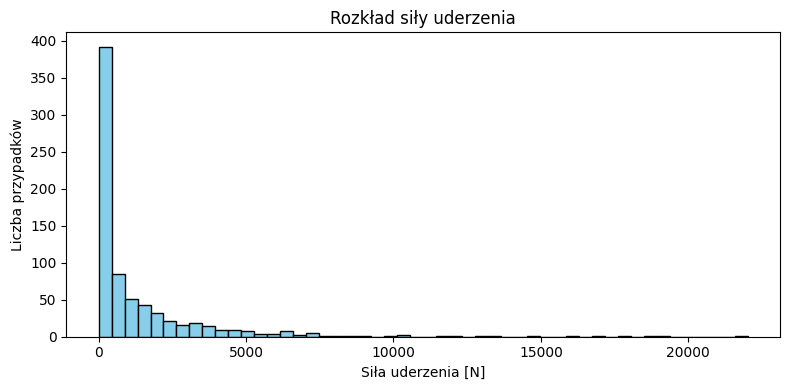

Bin edges (log): [1.00000000e+00 1.22138152e+00 1.49177282e+00 1.82202376e+00
 2.22538616e+00 2.71804553e+00 3.31977059e+00 4.05470646e+00
 4.95234355e+00 6.04870091e+00 7.38777153e+00 9.02328764e+00
 1.10208768e+01 1.34606953e+01 1.64406445e+01 2.00802994e+01
 2.45257067e+01 2.99552450e+01 3.65867827e+01 4.46864204e+01
 5.45791681e+01 6.66619875e+01 8.14197198e+01 9.94445413e+01
 1.21459725e+02 1.48348664e+02 1.81190317e+02 2.21302506e+02
 2.70294791e+02 3.30133064e+02 4.03218424e+02 4.92483533e+02
 6.01510287e+02 7.34673551e+02 8.97316700e+02 1.09596604e+03
 1.33859267e+03 1.63493235e+03 1.99687616e+03 2.43894765e+03
 2.97888559e+03 3.63835582e+03 4.44382057e+03 5.42760034e+03
 6.62917077e+03 8.09674669e+03 9.88921680e+03 1.20785067e+04
 1.47524649e+04 1.80183880e+04 2.20073262e+04]
Histogram (zliczenia): [ 0  0  0  1  1  2  5  5  4  3  4  2  7  3  9  4 11 10 15 10 16 18 25 21
 45 39 34 30 25 27 26 19 25 31 23 25 34 26 31 18 26 19 18 14  8  4  5  2
  4  3]
Prawdopodobieństwa histogra

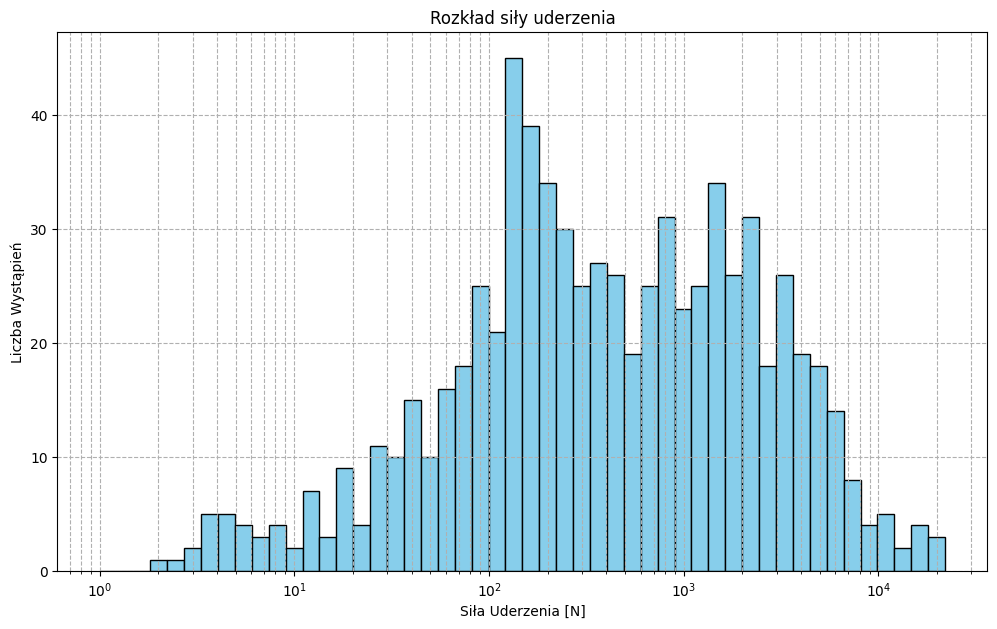

In [6]:
# impact_magnitudes = []
# not_zero_impacts = 0
# for race in data:
#     race = np.array(race)
#     # Zakładam, że mLastImpactMagnitude to jedna z ostatnich 24 cech, np. indeks 1
#     impact_magnitudes.extend(race[:, -4])  # -23 jeśli to druga cecha z końca, popraw jeśli inny indeks





# for magnitude in impact_magnitudes:
#     if magnitude > 0:
#         not_zero_impacts += 1


# prob_imp = not_zero_impacts / len(impact_magnitudes)
# print("Prawdopodobieństwo wystąpienia uderzenia:", prob_imp)

# impact_magnitudes = np.array(impact_magnitudes)
# impact_starts = 0
# total_steps = 0
#Check if ever impact happened during pit
impact_flags = []
pit_flags = []
for race in data:
    impact_len = 0
    race = np.array(race)
    impact_flags.extend(race[:, 11])  # -26 jeśli to druga cecha z końca
    pit_flags.extend(race[:, 12])  # Assuming pit flag is at index 29

imp_arr = np.array(impact_flags)
pit_arr = np.array(pit_flags)

# 2. Stwórz maskę logiczną: Gdzie w OBU tablicach jest jedynka?
# Używamy operatora '&' (AND)
pit_1 = pit_arr[pit_arr == 1]
print("Liczba kroków w pit-stopie:", len(pit_1))
both_happened = (imp_arr == 1) & (pit_arr == 1)

# --- ODPOWIEDZI ---

# Czy w ogóle się to zdarzyło? (True/False)
did_it_happen = np.any(both_happened)
print(f"Czy zdarzyło się uderzenie w trakcie wizyty w pit-stopie? {did_it_happen}")

# Ile razy się to zdarzyło?
count = np.sum(both_happened)
print(f"Liczba takich przypadków: {count}")

# Na których indeksach (krokach) to się stało?
if count > 0:
    indices = np.where(both_happened)[0]
    print(f"Indeksy zdarzeń: {indices}")



lasd = []
sum_len = 0
impacts_in_races = 0
# Zbierz wszystkie wartości siły uderzenia
impact_magnitudes = []
for race in data:
    impact_len = 0
    race = np.array(race)
    impact_magnitudes.extend(race[:, 33])  # -26 jeśli to druga cecha z końca
    sum_len += len(race)
    for step in race:
        if step[11] == 1:
            impact_len += 1
    impacts_in_races += impact_len
    print("Liczba uderzeń w wyścigu:", impact_len)
    lasd.append(impact_len)

lasd = np.array(lasd)
median_impacts = np.median(lasd)

max_impact = np.max(lasd)
lasd = lasd[lasd != max_impact]
impacts_in_races -= max_impact

max_impact = np.max(lasd)
lasd = lasd[lasd != max_impact]
impacts_in_races -= max_impact


print("Mediana liczby uderzeń na wyścig:", median_impacts)
impact_per_race = impacts_in_races / (len(data) - 2)
print("Średnia liczba uderzeń na wyścig:", impact_per_race)



    
    



print("Łączna liczba kroków we wszystkich wyścigach:", sum_len)
prob_imp = impacts_in_races / sum_len
print("Prawdopodobieństwo wystąpienia uderzenia:", prob_imp)



        

impact_magnitudes = np.array(impact_magnitudes)

impact_magnitudes = impact_magnitudes[impact_magnitudes > 0]  # tylko wartości większe niż 0

# Policz histogram (np. 20 przedziałów)
# hist, bin_edges = np.histogram(impact_magnitudes, bins=90, density=True)
# print("Bin edges:", bin_edges)
# probabilities = hist / hist.sum()  # prawdopodobieństwa dla każdego przedziału
# print(probabilities)
print(max(impact_magnitudes))
plt.figure(figsize=(8, 4))
plt.hist(impact_magnitudes, bins=50, color='skyblue', edgecolor='black')
plt.title("Rozkład siły uderzenia")
plt.xlabel("Siła uderzenia [N]")
plt.ylabel("Liczba przypadków")
plt.tight_layout()
plt.show()

min_val = np.min(impact_magnitudes)
max_val = np.max(impact_magnitudes) # np. 22000

# Użyj np. 1.0 jako absolutnego minimum, jeśli min_val jest bardzo małe
min_exp = np.log10(max(1.0, min_val)) 
max_exp = np.log10(max_val)

# num=51 da 50 binów
log_bin_edges = np.logspace(min_exp, max_exp, num=51)

# 3. Stwórz histogram (zliczający) używając tych binów
hist, bin_edges = np.histogram(impact_magnitudes, bins=log_bin_edges, density=False)

# 4. Przekształć zliczenia na prawdopodobieństwa
# To jest PMF dla uderzeń > 0
probabilities_hist = hist / hist.sum()

print("Bin edges (log):", bin_edges)
print("Histogram (zliczenia):", hist)
print("Prawdopodobieństwa histogramu:", probabilities_hist)

# Oblicz szerokość każdego słupka (w skali logarytmicznej!)
# Musimy użyć 'bin_edges'
bar_widths = bin_edges[1:] - bin_edges[:-1]

# Oblicz środek każdego słupka (dla etykiet osi X)
bar_centers = bin_edges[:-1] + bar_widths / 2.0

# --- Krok 2: Narysuj wykres ---
plt.figure(figsize=(12, 7))

# Stwórz wykres słupkowy
# 'hist' to wysokość (zliczenia)
# 'bin_edges' to pozycje na osi X
# 'width' to szerokość każdego słupka
plt.bar(bin_edges[:-1], hist, width=bar_widths, align='edge', edgecolor='black', color='skyblue')

# --- Krok 3: Ustaw oś X na logarytmiczną (KLUCZOWE!) ---
# To sprawi, że słupki będą wyglądały na równe wizualnie
plt.xscale('log')

# --- Krok 4: Dodaj etykiety i pokaż ---
plt.xlabel('Siła Uderzenia [N]')
plt.ylabel('Liczba Wystąpień')
plt.title('Rozkład siły uderzenia')
plt.grid(True, which="both", ls="--") # Pokaż siatkę

# Pokaż wykres
plt.show()

# # 5. Zapisz wyniki
# np.save('probabilities.npy', probabilities_hist)
# np.save('bin_edges.npy', bin_edges)

np.save('E:/pracadyp/Race-optimization-reinforcement-learning/data/probabilities_impact/probabilities.npy', probabilities_hist)
np.save('E:/pracadyp/Race-optimization-reinforcement-learning/data/probabilities_impact/bin_edges.npy', bin_edges)


Map damages to impact magnitude

In [8]:
# Znajdź najmniejszą siłę uderzenia, która spowodowała wzrost uszkodzenia
min_impact_with_damage = float('inf')
examples = []

for race in data:
    race = np.array(race)
    
    if len(race) < 2:
        continue
    
    # Porównaj kolejne kroki
    for i in range(1, len(race)):
        # Dent severity: kolumny 20-27 (8 elementów)
        dents_before = race[i-1, 16:16+8]
        dents_after = race[i, 16:16+8]
        
        # Impact magnitude w kroku t
        impact_mag = race[i, 33]
        
        # Sprawdź czy było uderzenie (impact > 0)
        if impact_mag > 0:
            # Sprawdź czy którykolwiek dent wzrósł
            delta = dents_after - dents_before
            if np.any(delta > 0):
                # Znaleziono wzrost uszkodzenia
                if impact_mag < min_impact_with_damage:
                    min_impact_with_damage = impact_mag
                
                # Zapisz kilka przykładów dla najniższych wartości
                if len(examples) < 10 or impact_mag < max(ex['impact'] for ex in examples):
                    examples.append({
                        'impact': impact_mag,
                        'before': dents_before.copy(),
                        'after': dents_after.copy(),
                        'delta': delta.copy()
                    })
                    # Sortuj i zostaw tylko 10 najniższych
                    examples = sorted(examples, key=lambda x: x['impact'])[:10]

print("=" * 70)
print(f"NAJMNIEJSZA SIŁA UDERZENIA POWODUJĄCA USZKODZENIE: {min_impact_with_damage:.2f} N")
print("=" * 70)

if examples:
    print("\nPrzykłady 10 najmniejszych uderzeń powodujących uszkodzenie:")
    print("-" * 70)
    for idx, ex in enumerate(examples, 1):
        print(f"\n{idx}. Impact: {ex['impact']:.2f} N")
        print(f"   Dents przed:  {ex['before']}")
        print(f"   Dents po:     {ex['after']}")
        print(f"   Zmiana:       {ex['delta']}")
        changed_indices = np.where(ex['delta'] > 0)[0]
        print(f"   Uszkodzone elementy: {changed_indices.tolist()}")

NAJMNIEJSZA SIŁA UDERZENIA POWODUJĄCA USZKODZENIE: 11.91 N

Przykłady 10 najmniejszych uderzeń powodujących uszkodzenie:
----------------------------------------------------------------------

1. Impact: 11.91 N
   Dents przed:  [1. 0. 0. 0. 0. 0. 0. 0.]
   Dents po:     [1. 2. 0. 0. 0. 0. 0. 0.]
   Zmiana:       [0. 2. 0. 0. 0. 0. 0. 0.]
   Uszkodzone elementy: [1]

2. Impact: 519.15 N
   Dents przed:  [0. 0. 0. 0. 0. 0. 0. 0.]
   Dents po:     [0. 0. 0. 0. 0. 0. 0. 1.]
   Zmiana:       [0. 0. 0. 0. 0. 0. 0. 1.]
   Uszkodzone elementy: [7]

3. Impact: 536.44 N
   Dents przed:  [0. 0. 0. 0. 0. 0. 0. 0.]
   Dents po:     [0. 2. 0. 0. 0. 0. 0. 0.]
   Zmiana:       [0. 2. 0. 0. 0. 0. 0. 0.]
   Uszkodzone elementy: [1]

4. Impact: 541.01 N
   Dents przed:  [0. 0. 0. 0. 0. 0. 0. 0.]
   Dents po:     [0. 0. 0. 0. 0. 0. 0. 1.]
   Zmiana:       [0. 0. 0. 0. 0. 0. 0. 1.]
   Uszkodzone elementy: [7]

5. Impact: 924.59 N
   Dents przed:  [1. 2. 0. 0. 0. 0. 0. 2.]
   Dents po:     [1. 2. 0. 0. 0. 

In [28]:
import numpy as np
import pandas as pd

# --- 1. Inicjalizacja list (POZA pętlą 'for race...') ---
all_impacts_t = []
all_dents_before_flat = [] # Stan w t-1
all_dents_after_flat = []  # Stan w t

print("Rozpoczynam zbieranie danych przejściowych (logika t-1 -> t)...")

for race in data:
    race = np.array(race)
    
    if len(race) < 2:
        continue # Pomiń wyścigi krótsze niż 2 kroki

    # 1. Stwórz "przesunięte" tablice, aby uzyskać pary (t-1) -> (t)
    
    # Stan wgnieceń w kroku 't-1' (ignorujemy ostatni krok)
    dents_t_minus_1 = race[:-1, 20:28] # Kolumny 20-27
    
    # Stan wgnieceń w kroku 't' (ignorujemy pierwszy krok)
    dents_t = race[1:, 20:28] 

    # Siła uderzenia w kroku 't' (ignorujemy pierwszy krok)
    impacts_t = race[1:, 13]
    
    # 2. Spłaszcz 8 elementów wgnieceń
    dents_t_minus_1_flat = dents_t_minus_1.flatten()
    dents_t_flat = dents_t.flatten()
    
    # 3. Powtórz impakty 8 razy, aby pasowały
    impacts_t_flat = np.repeat(impacts_t, 8)
    
    # 4. Rozszerz główne listy
    all_impacts_t.extend(impacts_t_flat)
    all_dents_before_flat.extend(dents_t_minus_1_flat)
    all_dents_after_flat.extend(dents_t_flat)

# --- 2. Konwersja na tablice NumPy ---
all_impacts_t = np.array(all_impacts_t)
all_dents_before_flat = np.array(all_dents_before_flat)
all_dents_after_flat = np.array(all_dents_after_flat)

print(f"Zebrano łącznie {len(all_impacts_t)} próbek przejściowych.")

import pandas as pd # Import pandas dla ładnego wyświetlania tabeli

# --- 3. Filtrowanie danych (Twoje reguły) ---
mask_impact_happened = all_impacts_t > 0
mask_can_be_damaged = all_dents_before_flat < 2.0 # Użyj stanu 'before' (t-1)
valid_mask = mask_impact_happened & mask_can_be_damaged

impacts_to_analyze = all_impacts_t[valid_mask]
dents_before_to_analyze = all_dents_before_flat[valid_mask]
dents_after_to_analyze = all_dents_after_flat[valid_mask]

# --- 4. Oblicz "Deltę" (o ile zmienił się stan) ---
delta_dents = dents_after_to_analyze - dents_before_to_analyze

print(f"Znaleziono {len(impacts_to_analyze)} ważnych próbek uszkodzeń.")

# --- 5. Stwórz Biny (Progi) ---
if len(impacts_to_analyze) > 0:
    min_val_safe = max(1.0, np.min(impacts_to_analyze))
    min_exp = np.log10(min_val_safe)
    max_exp = np.log10(np.max(impacts_to_analyze))
    num_bins = 20
    bin_edges = np.logspace(min_exp, max_exp, num=num_bins + 1)
    
    bin_indices = np.digitize(impacts_to_analyze, bins=bin_edges)

    # --- 6. Oblicz Prawdopodobieństwa dla każdego Progu ---
    damage_map_list = []
    
    for i in range(1, num_bins + 1):
        deltas_in_this_bin = delta_dents[bin_indices == i]
        total_in_bin = len(deltas_in_this_bin)
        
        bin_range = f"[{bin_edges[i-1]:.0f} - {bin_edges[i]:.0f})"
        
        if total_in_bin == 0:
            prob_map = {'Próg Siły [N]': bin_range, 'Liczba Próbek': 0, 'P(Zmiana = 1)': 0.0, 'P(Zmiana = 2)': 0.0}
        else:
            p1 = np.sum(deltas_in_this_bin == 1) / total_in_bin
            p2 = np.sum(deltas_in_this_bin == 2) / total_in_bin
            
            prob_map = {
                'Próg Siły [N]': bin_range,
                'Liczba Próbek': total_in_bin,
                'P(Zmiana = 1)': p1,
                'P(Zmiana = 2)': p2
            }
        damage_map_list.append(prob_map)

    # --- 7. Wyświetl finalną "Mapę" ---
    df_damage_map = pd.DataFrame(damage_map_list)
    pd.set_option('display.precision', 3) 

    print("\n--- (POPRAWIONA) Mapa Prawdopodobieństwa Zmiany Wgniecenia ---")
    print(df_damage_map.to_string())
else:
    print("Nie znaleziono żadnych próbek uszkodzeń spełniających kryteria.")

Rozpoczynam zbieranie danych przejściowych (logika t-1 -> t)...
Zebrano łącznie 542280 próbek przejściowych.
Znaleziono 3219 ważnych próbek uszkodzeń.

--- (POPRAWIONA) Mapa Prawdopodobieństwa Zmiany Wgniecenia ---
   Próg Siły [N]  Liczba Próbek  P(Zmiana = 1)  P(Zmiana = 2)
0        [1 - 1)              0      0.000e+00            0.0
1        [1 - 1)             14      0.000e+00            0.0
2        [1 - 1)              0      0.000e+00            0.0
3        [1 - 1)             13      0.000e+00            0.0
4        [1 - 1)              6      0.000e+00            0.0
5        [1 - 1)              8      0.000e+00            0.0
6        [1 - 1)              0      0.000e+00            0.0
7        [1 - 1)              0      0.000e+00            0.0
8        [1 - 1)              0      0.000e+00            0.0
9        [1 - 1)              0      0.000e+00            0.0
10       [1 - 1)              0      0.000e+00            0.0
11       [1 - 1)              8      0.00

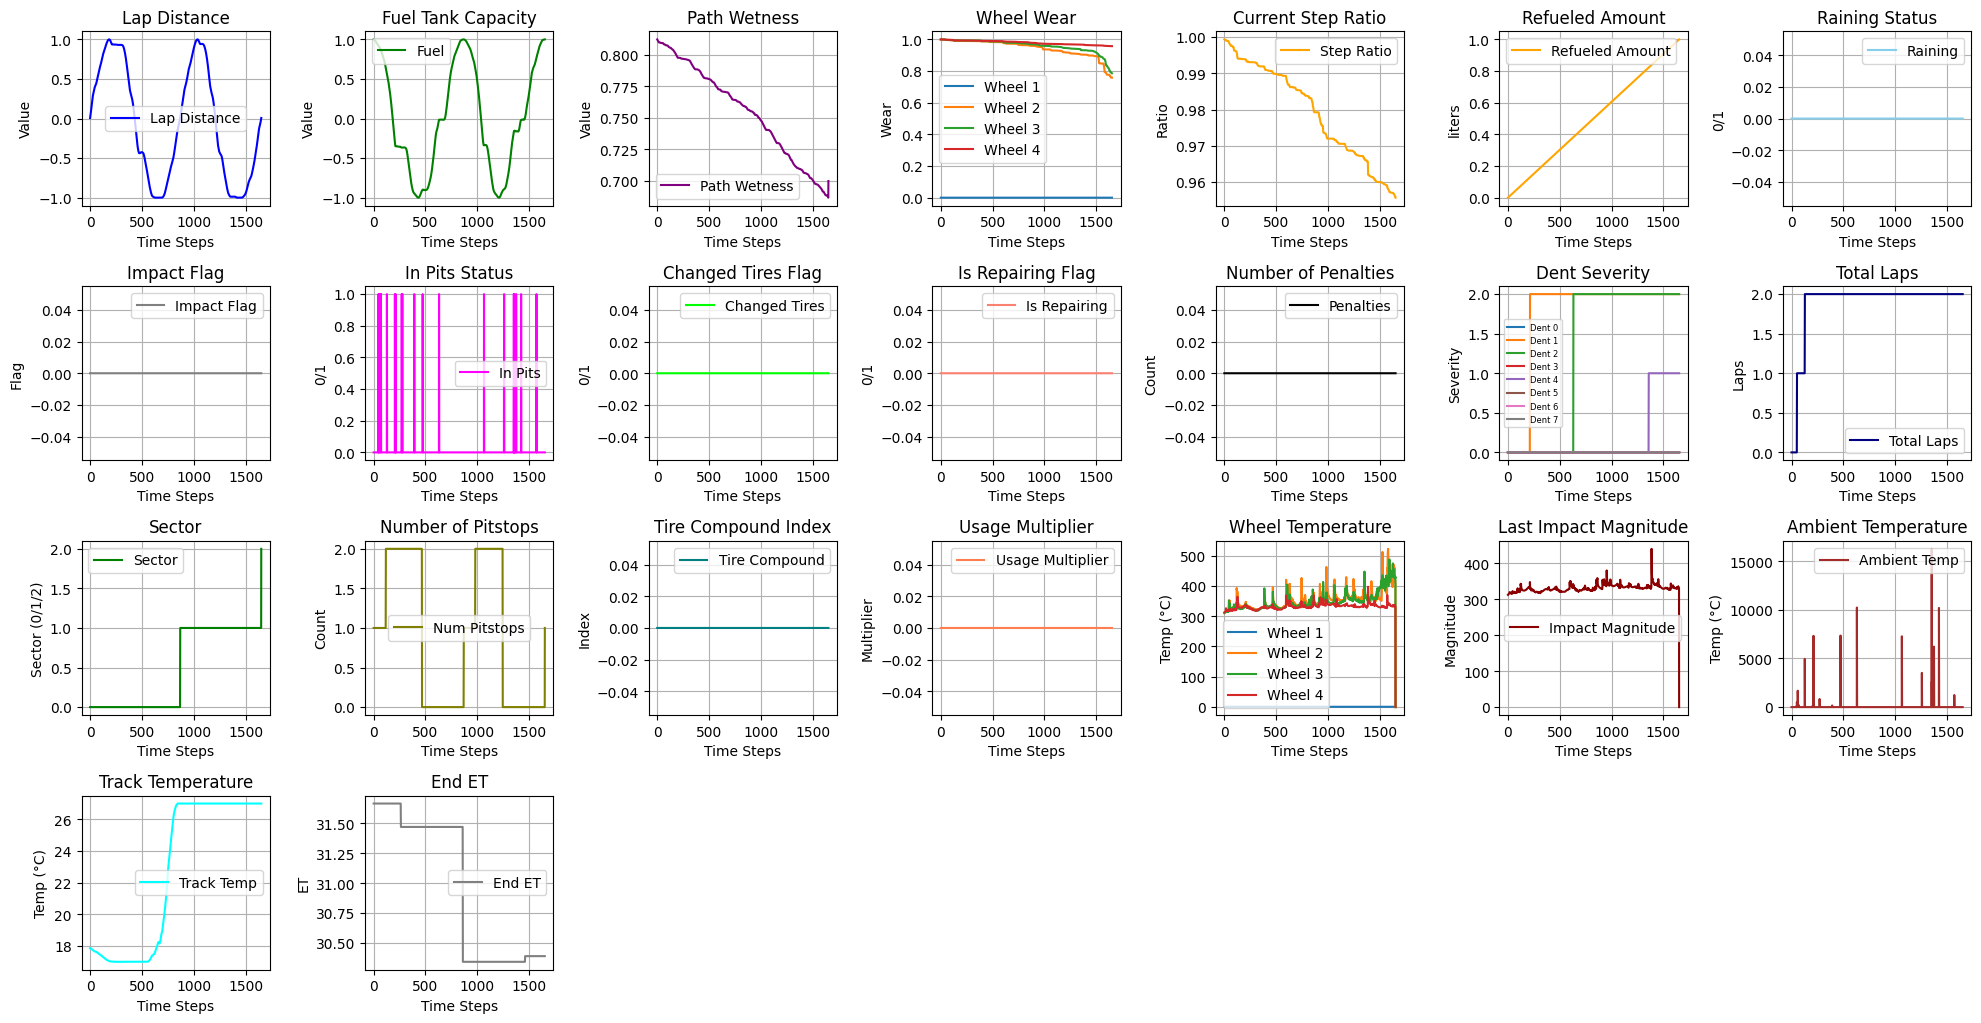

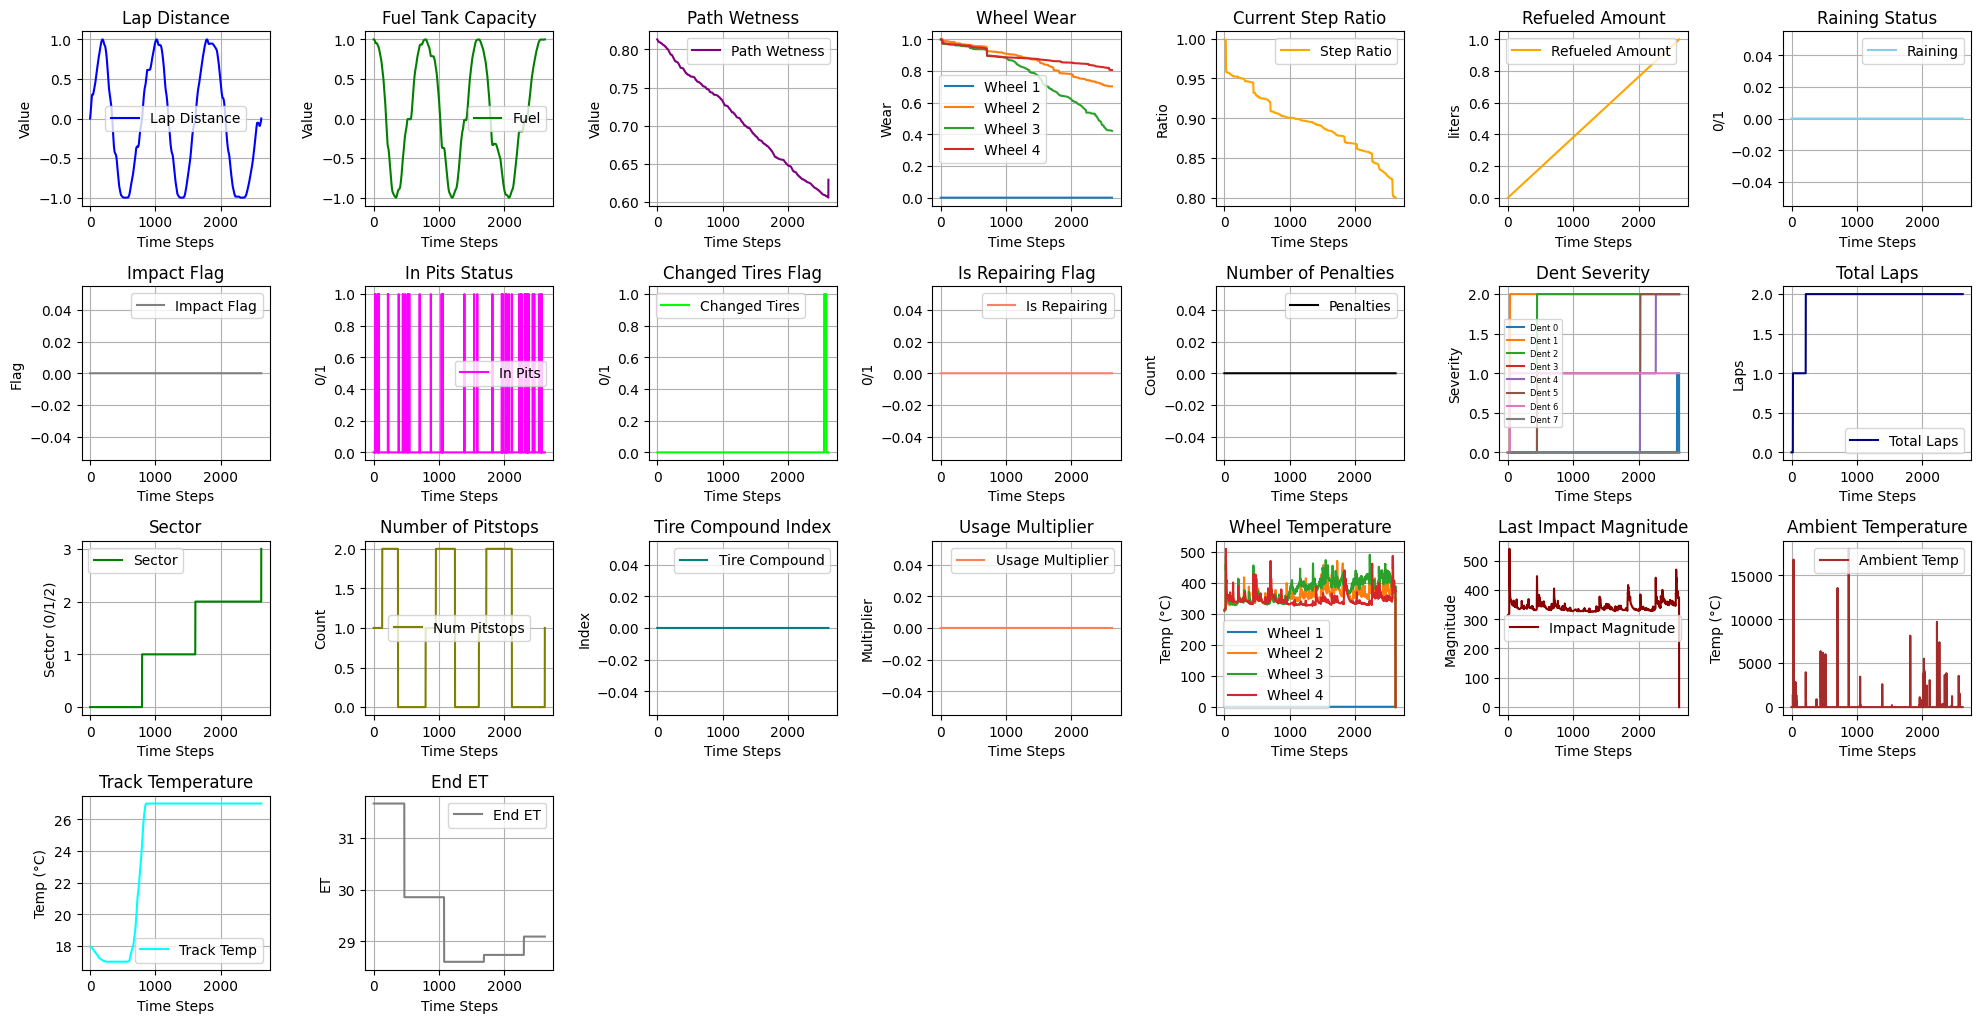

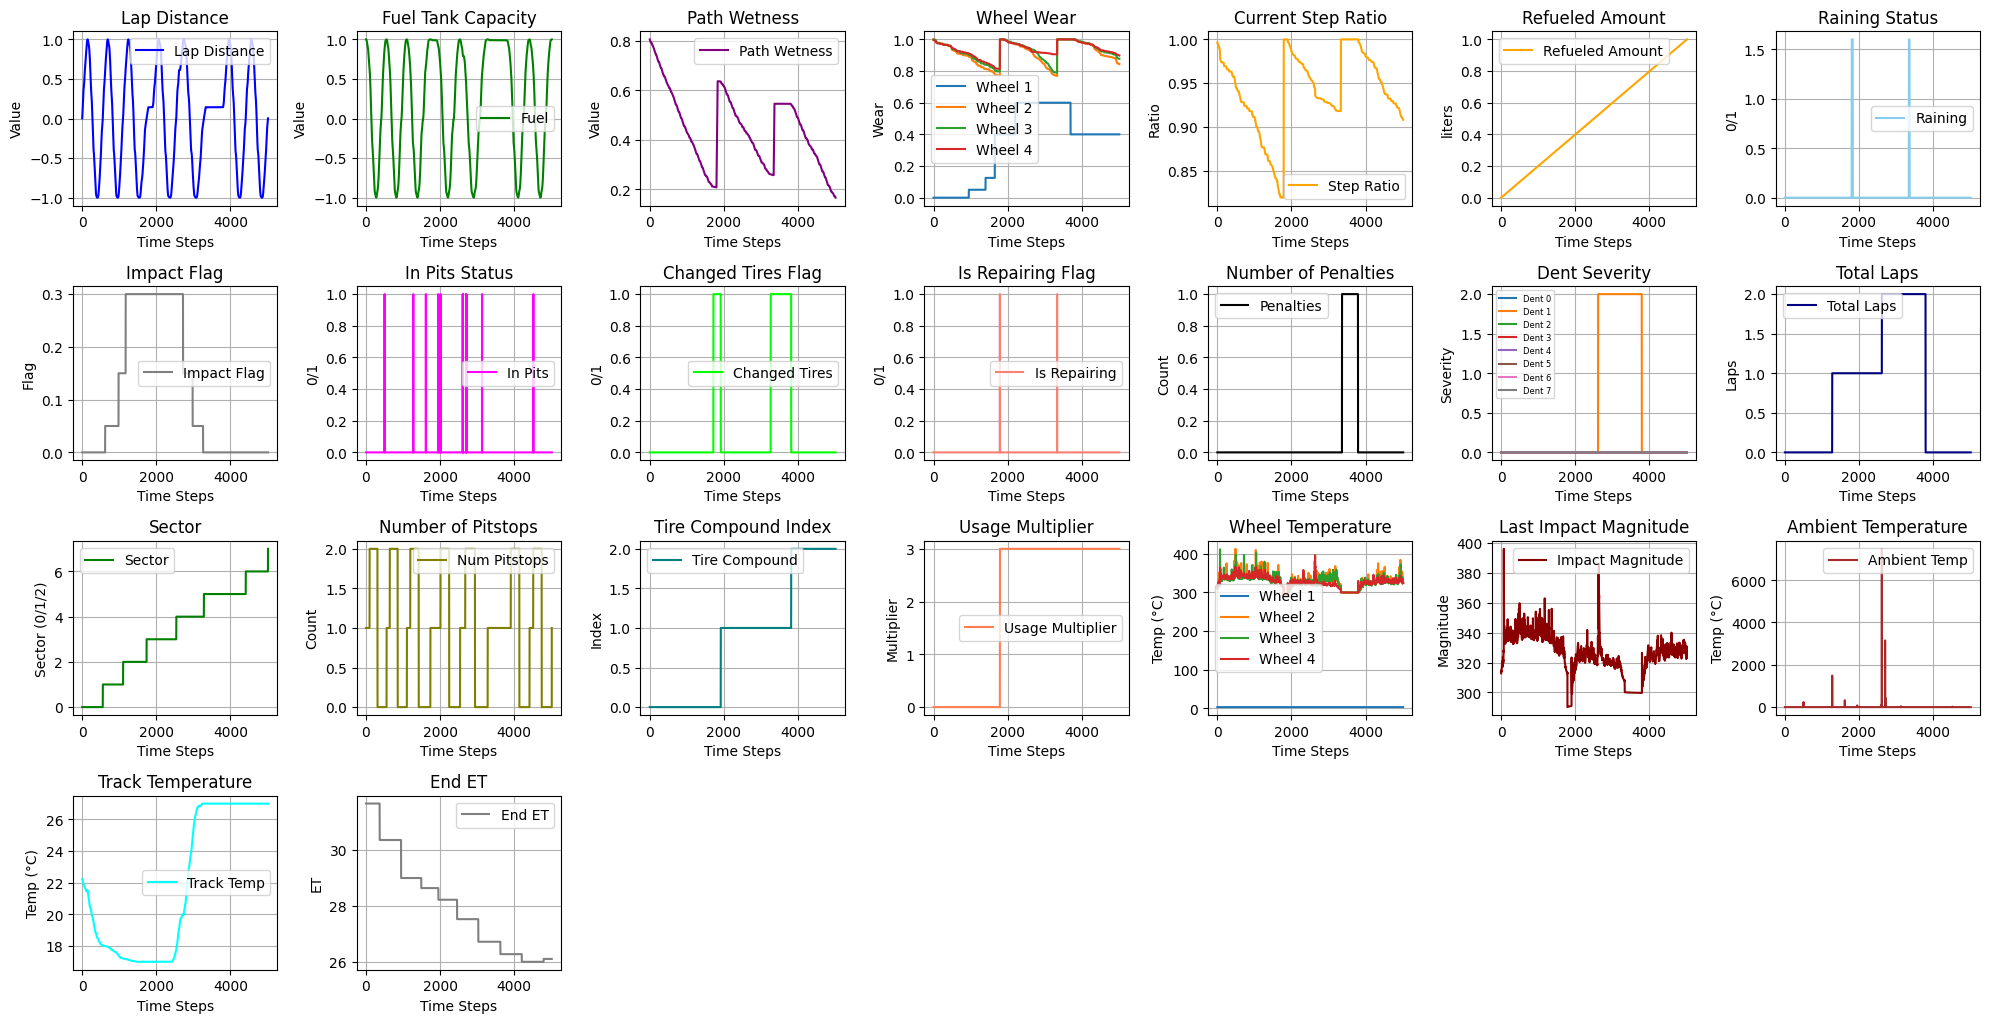

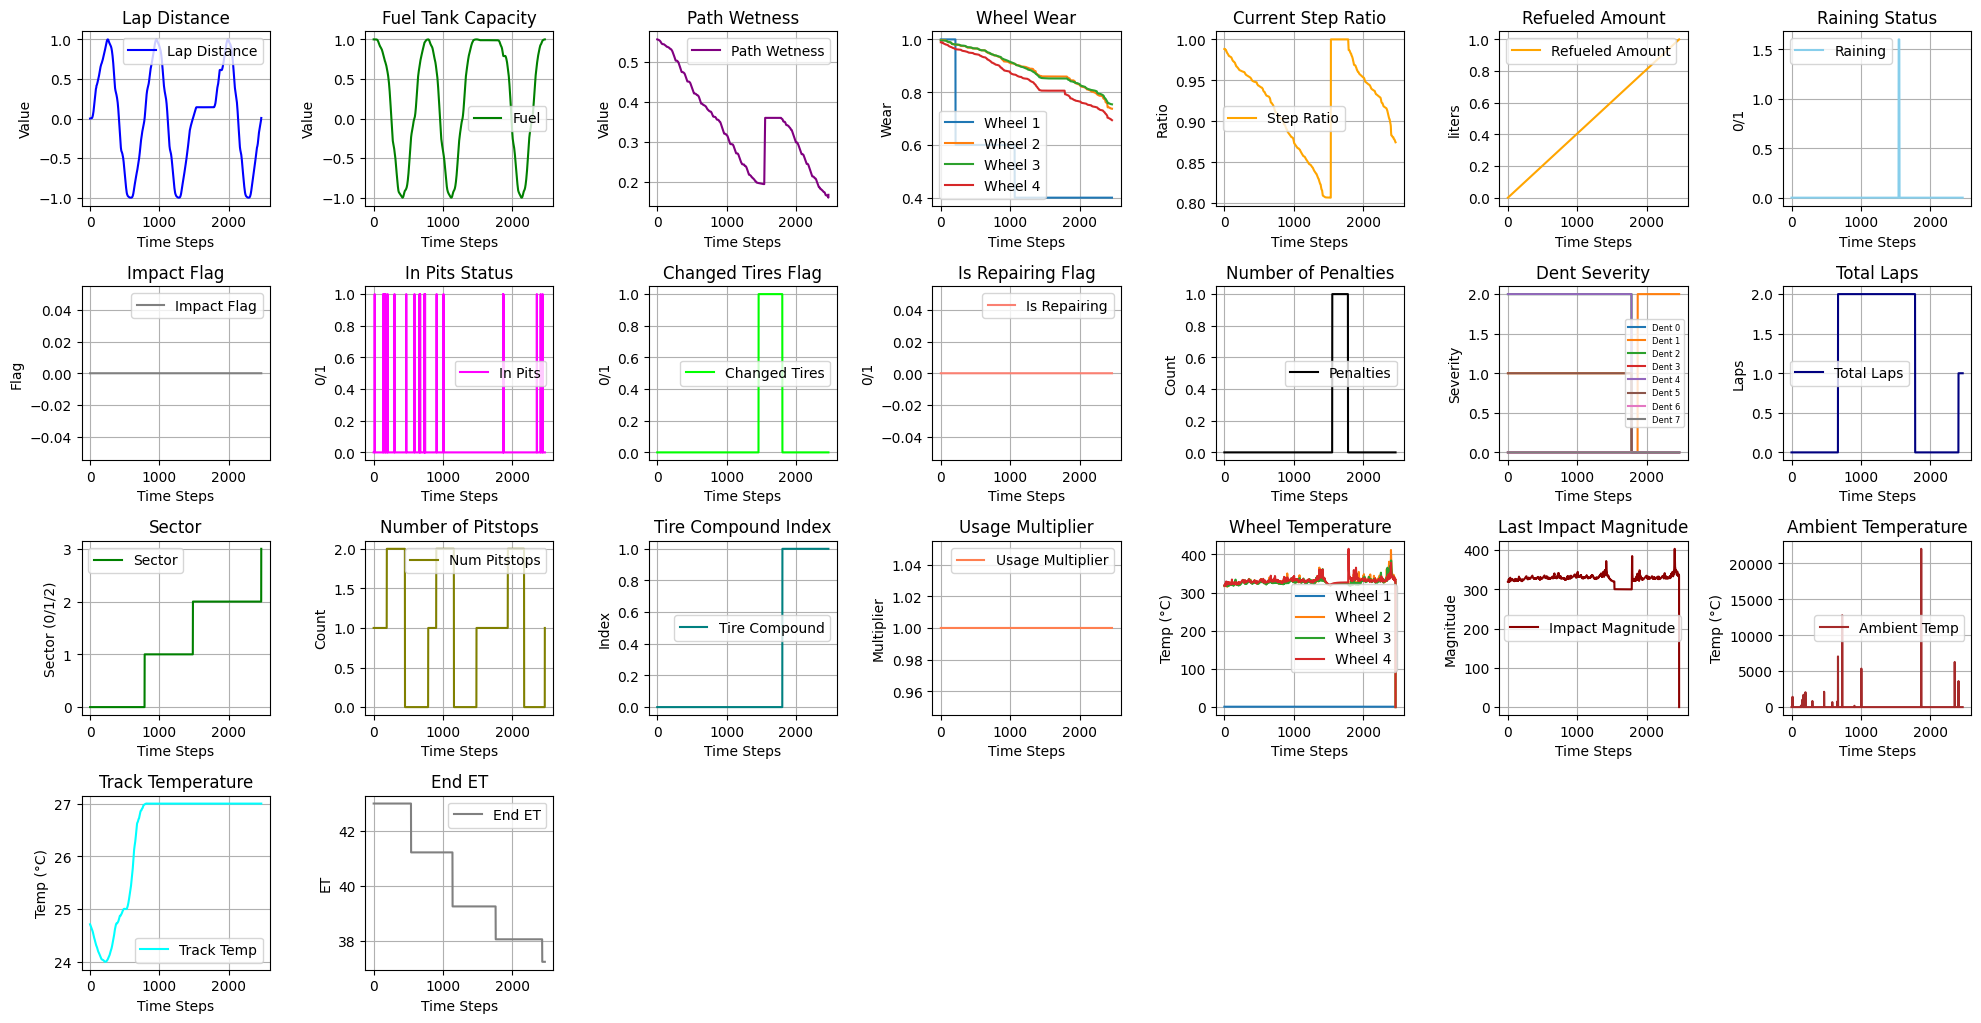

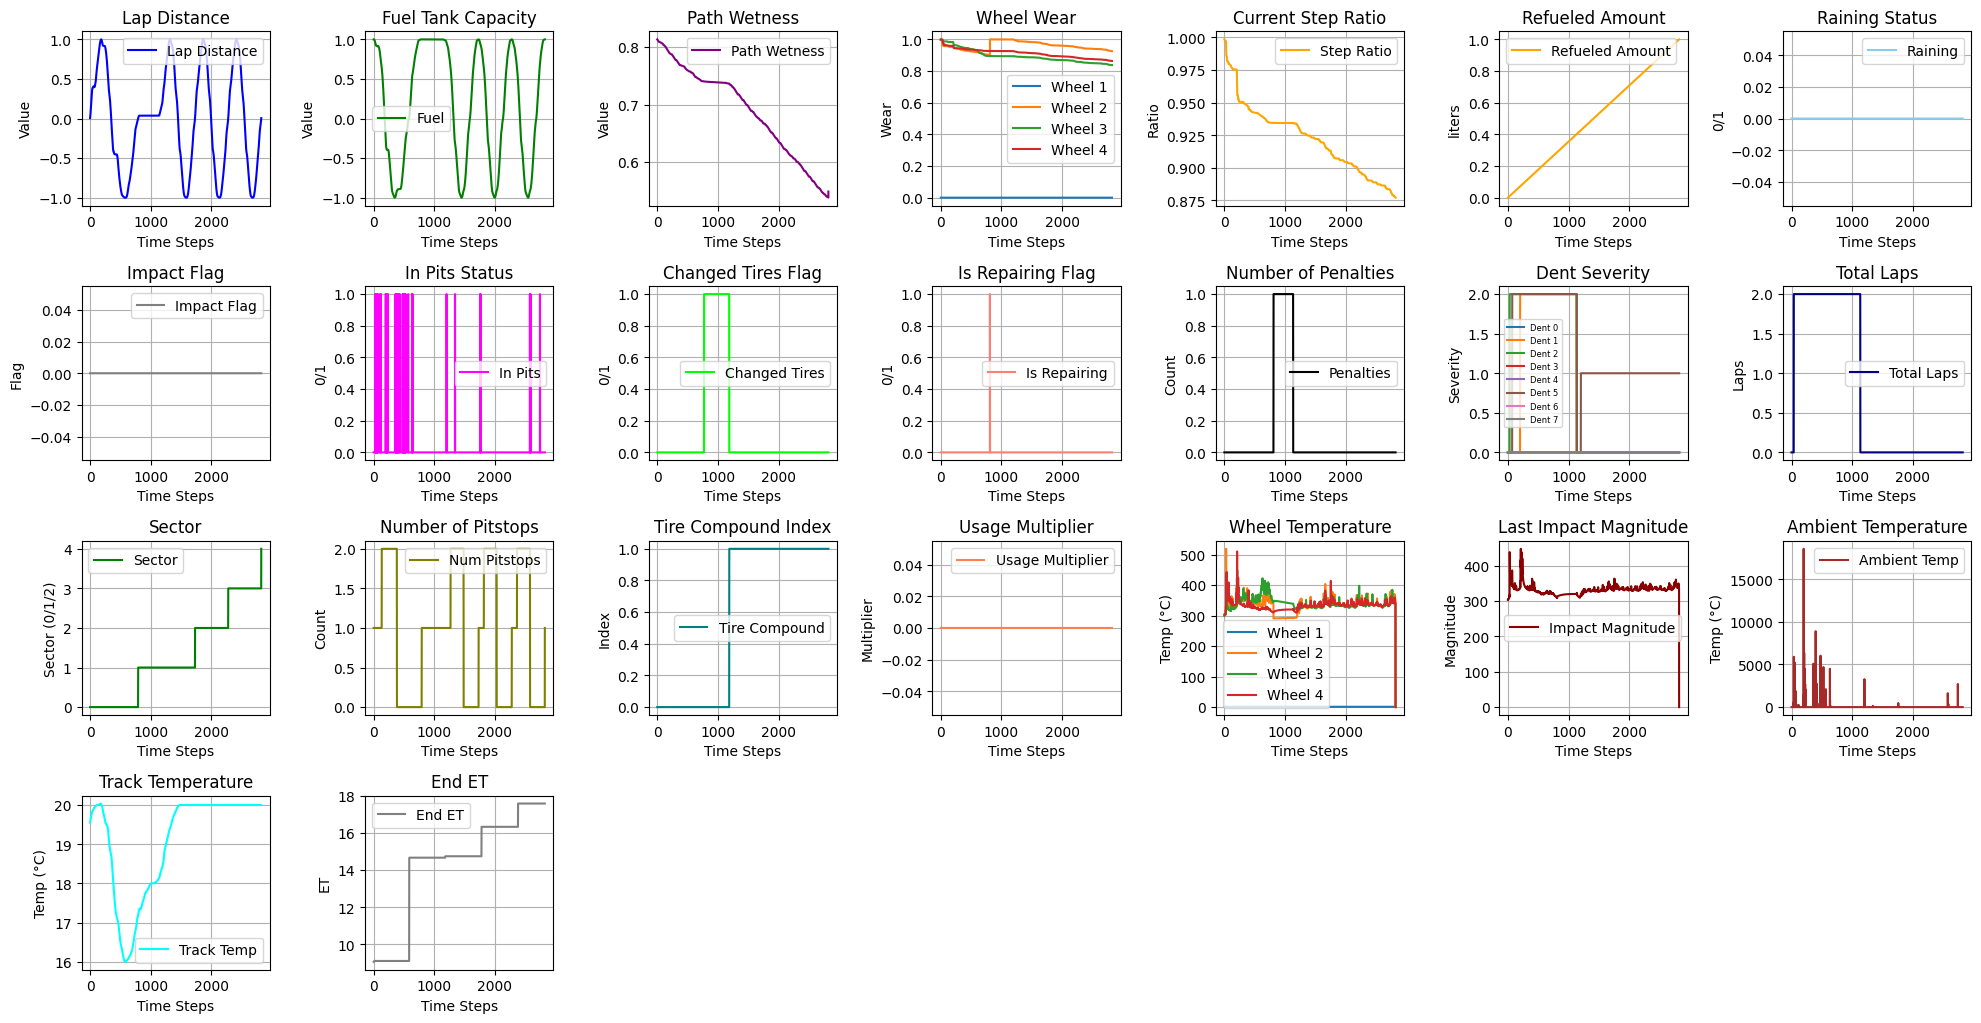

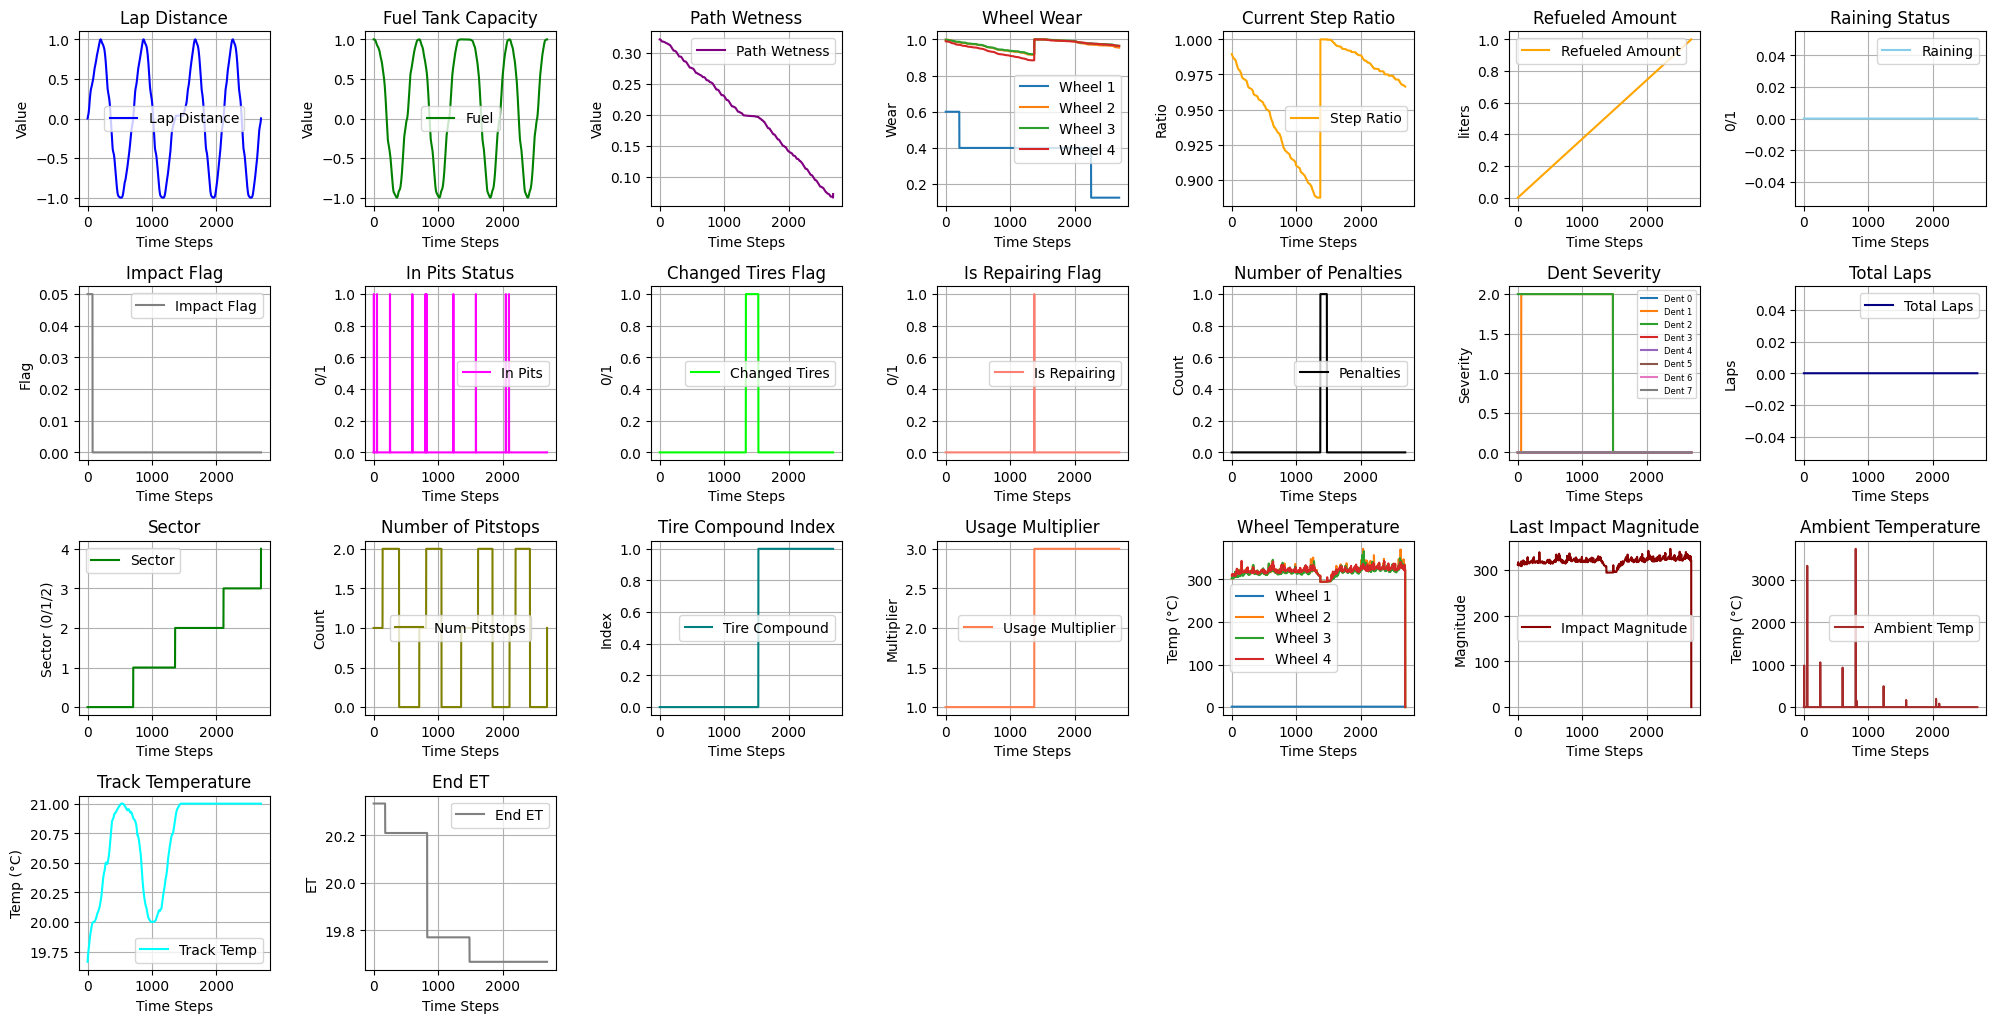

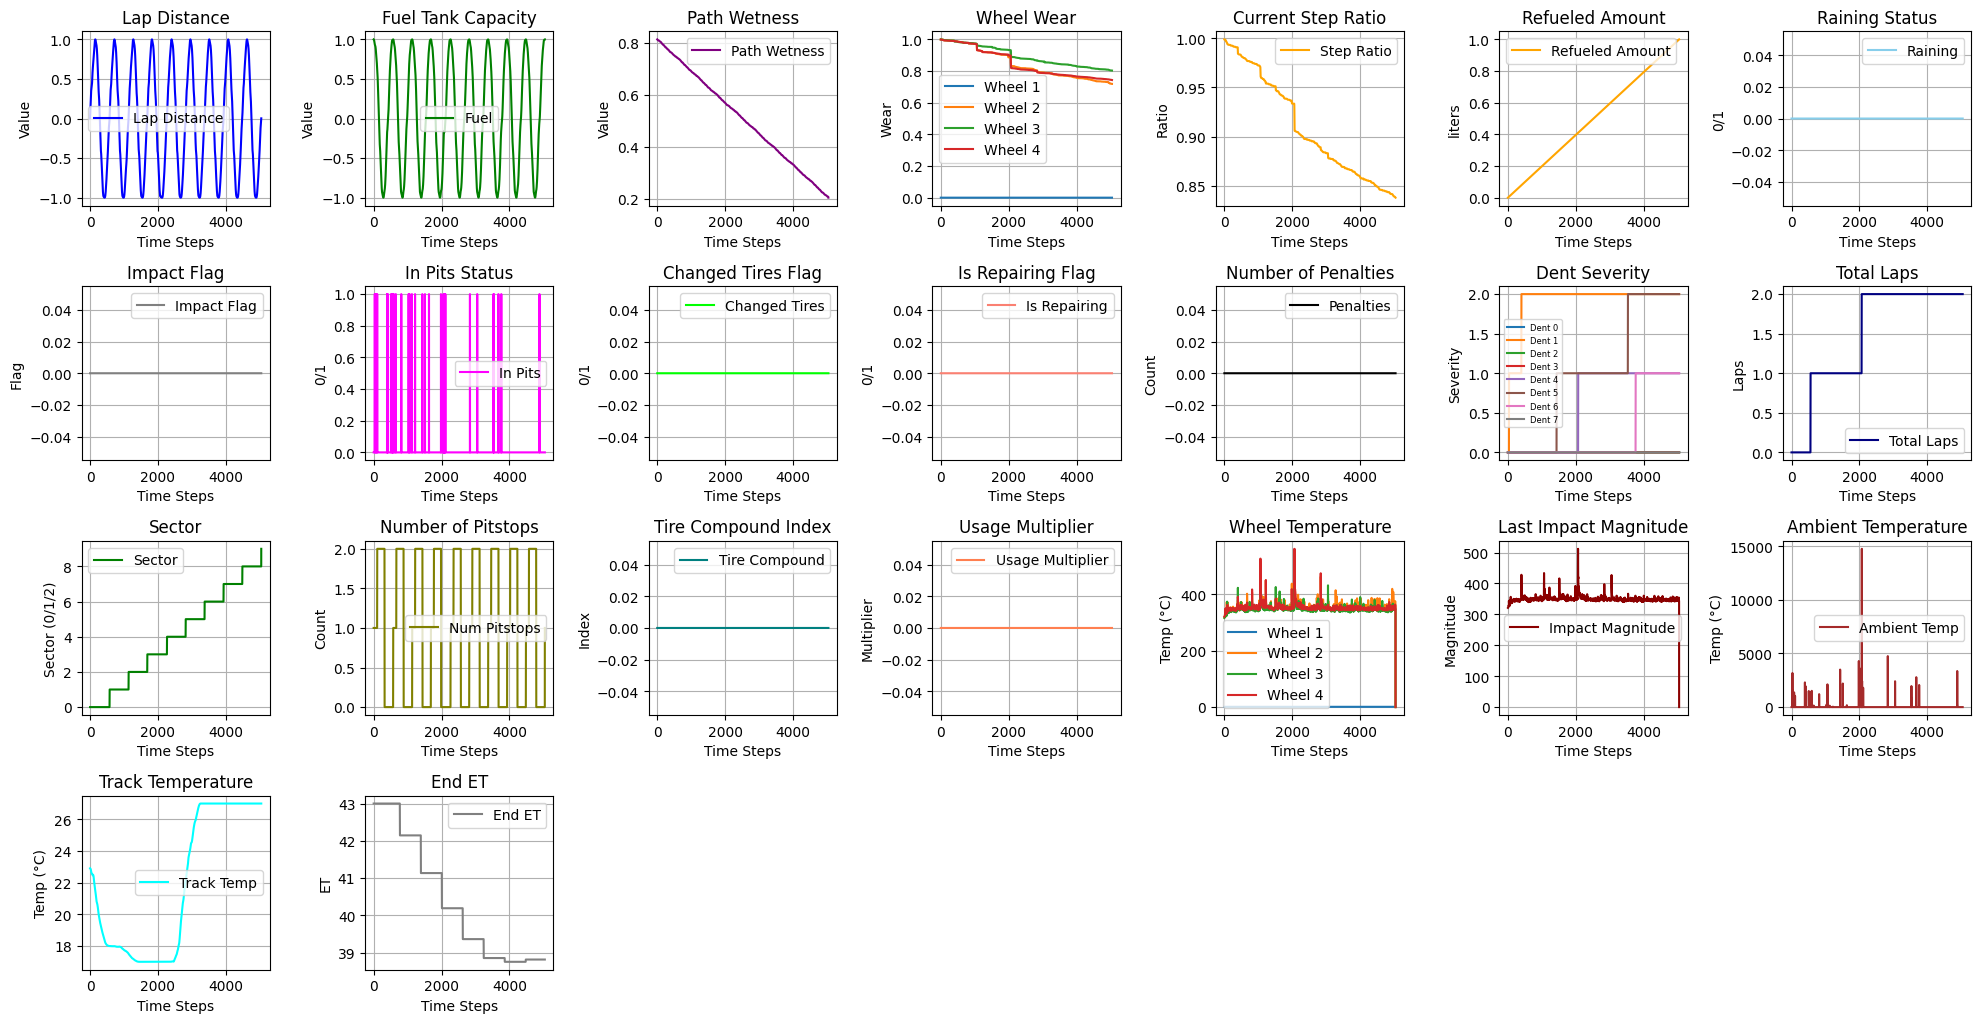

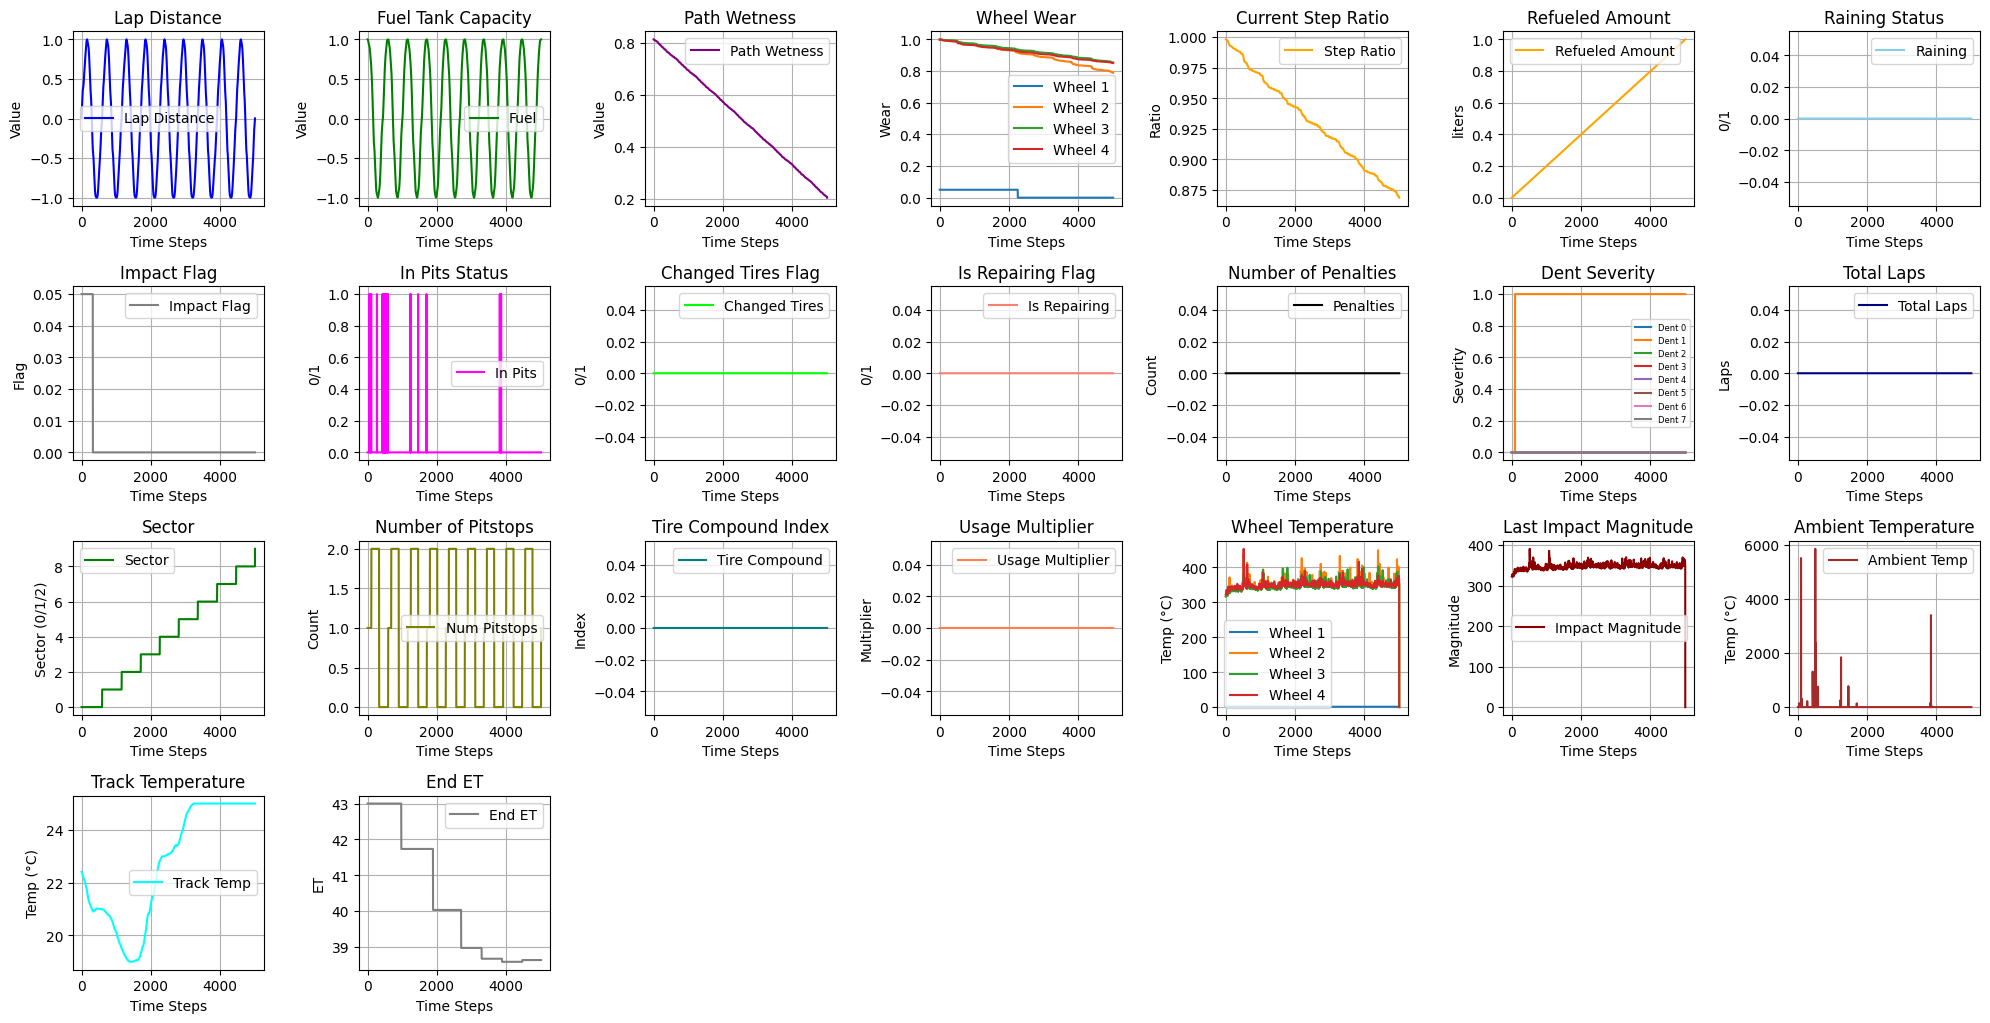

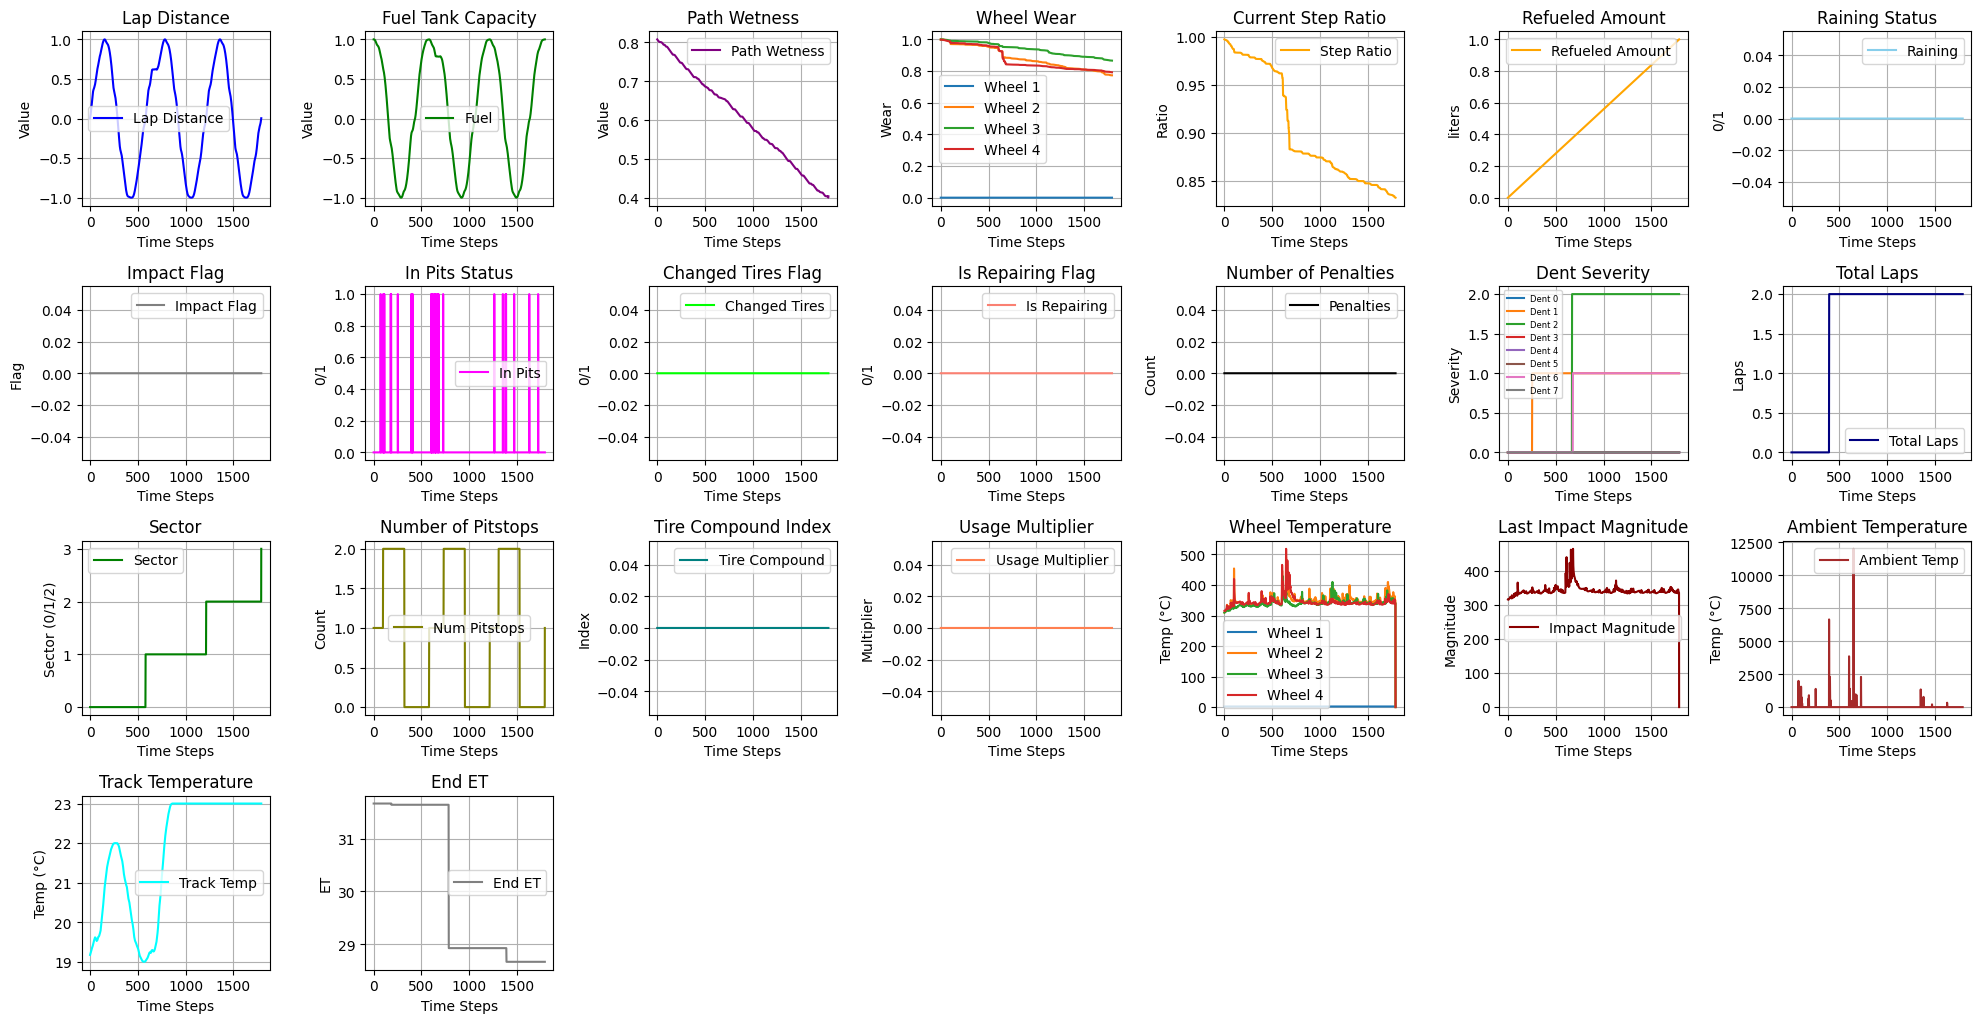

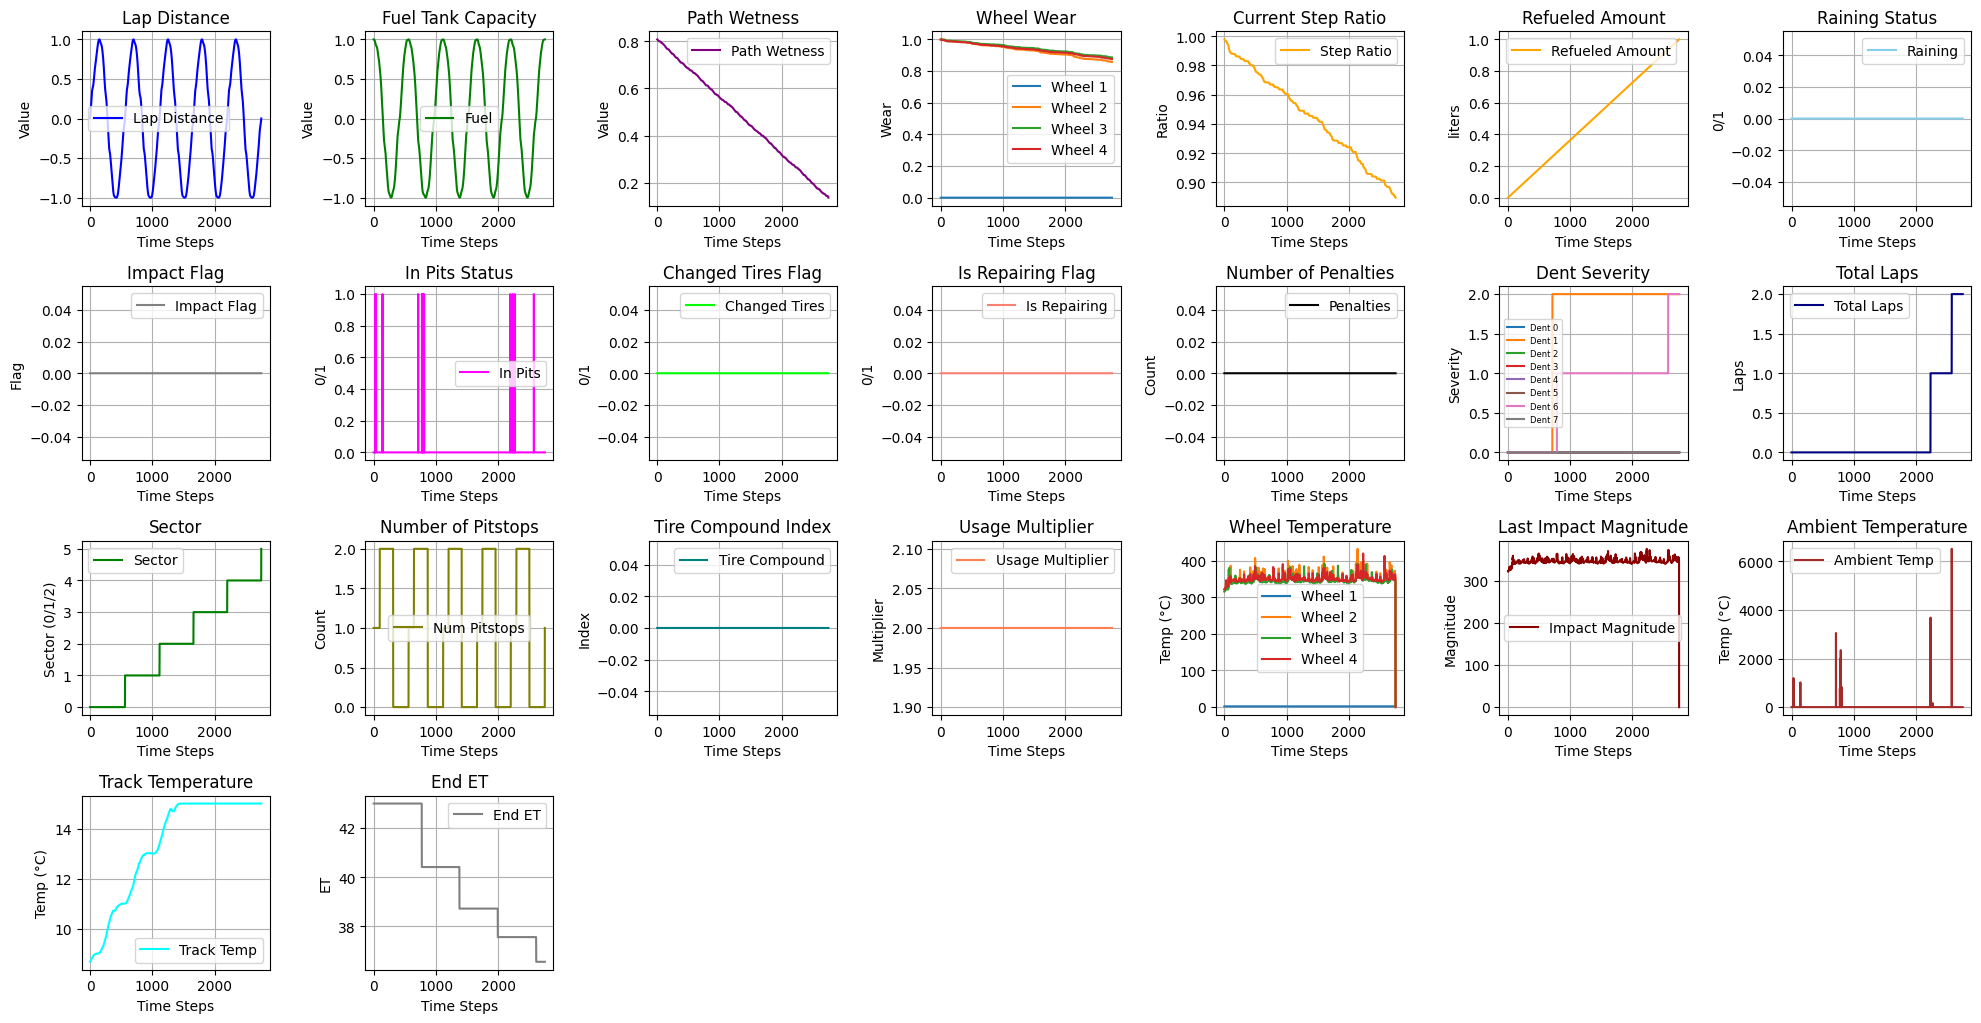

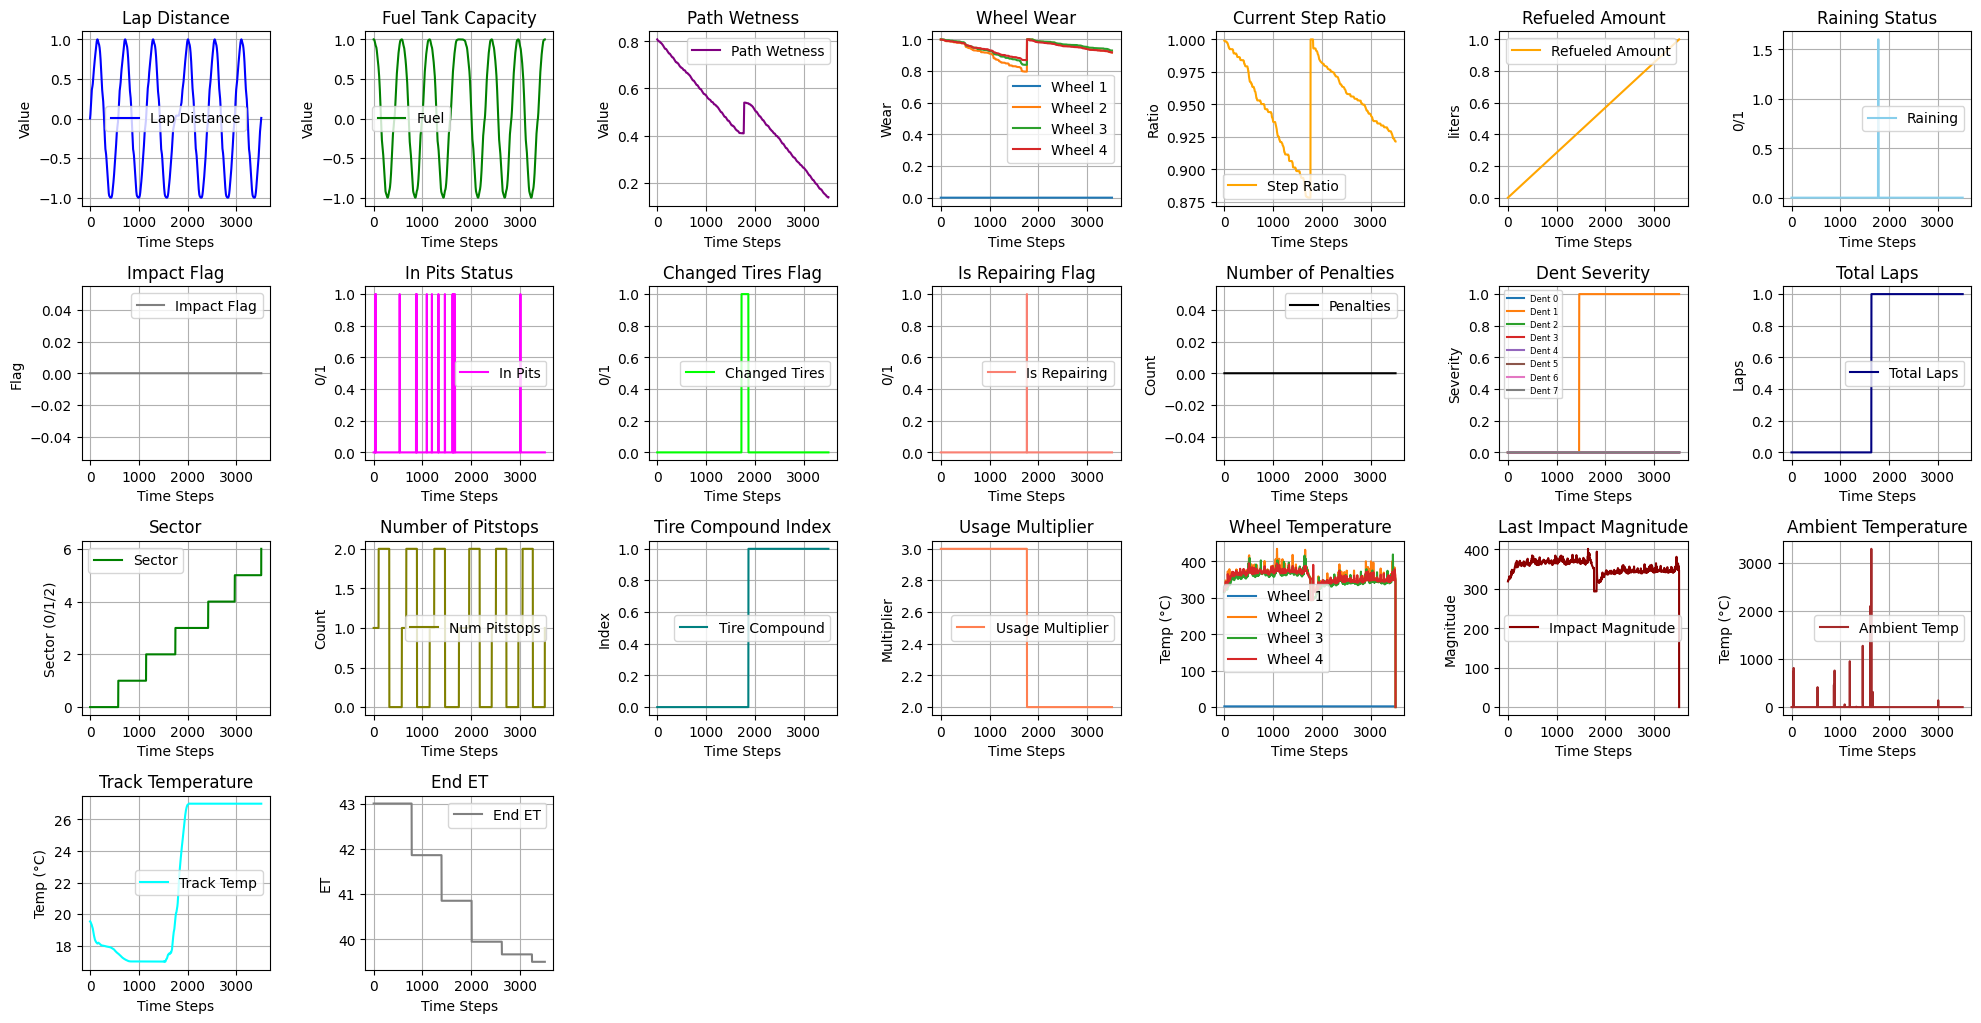

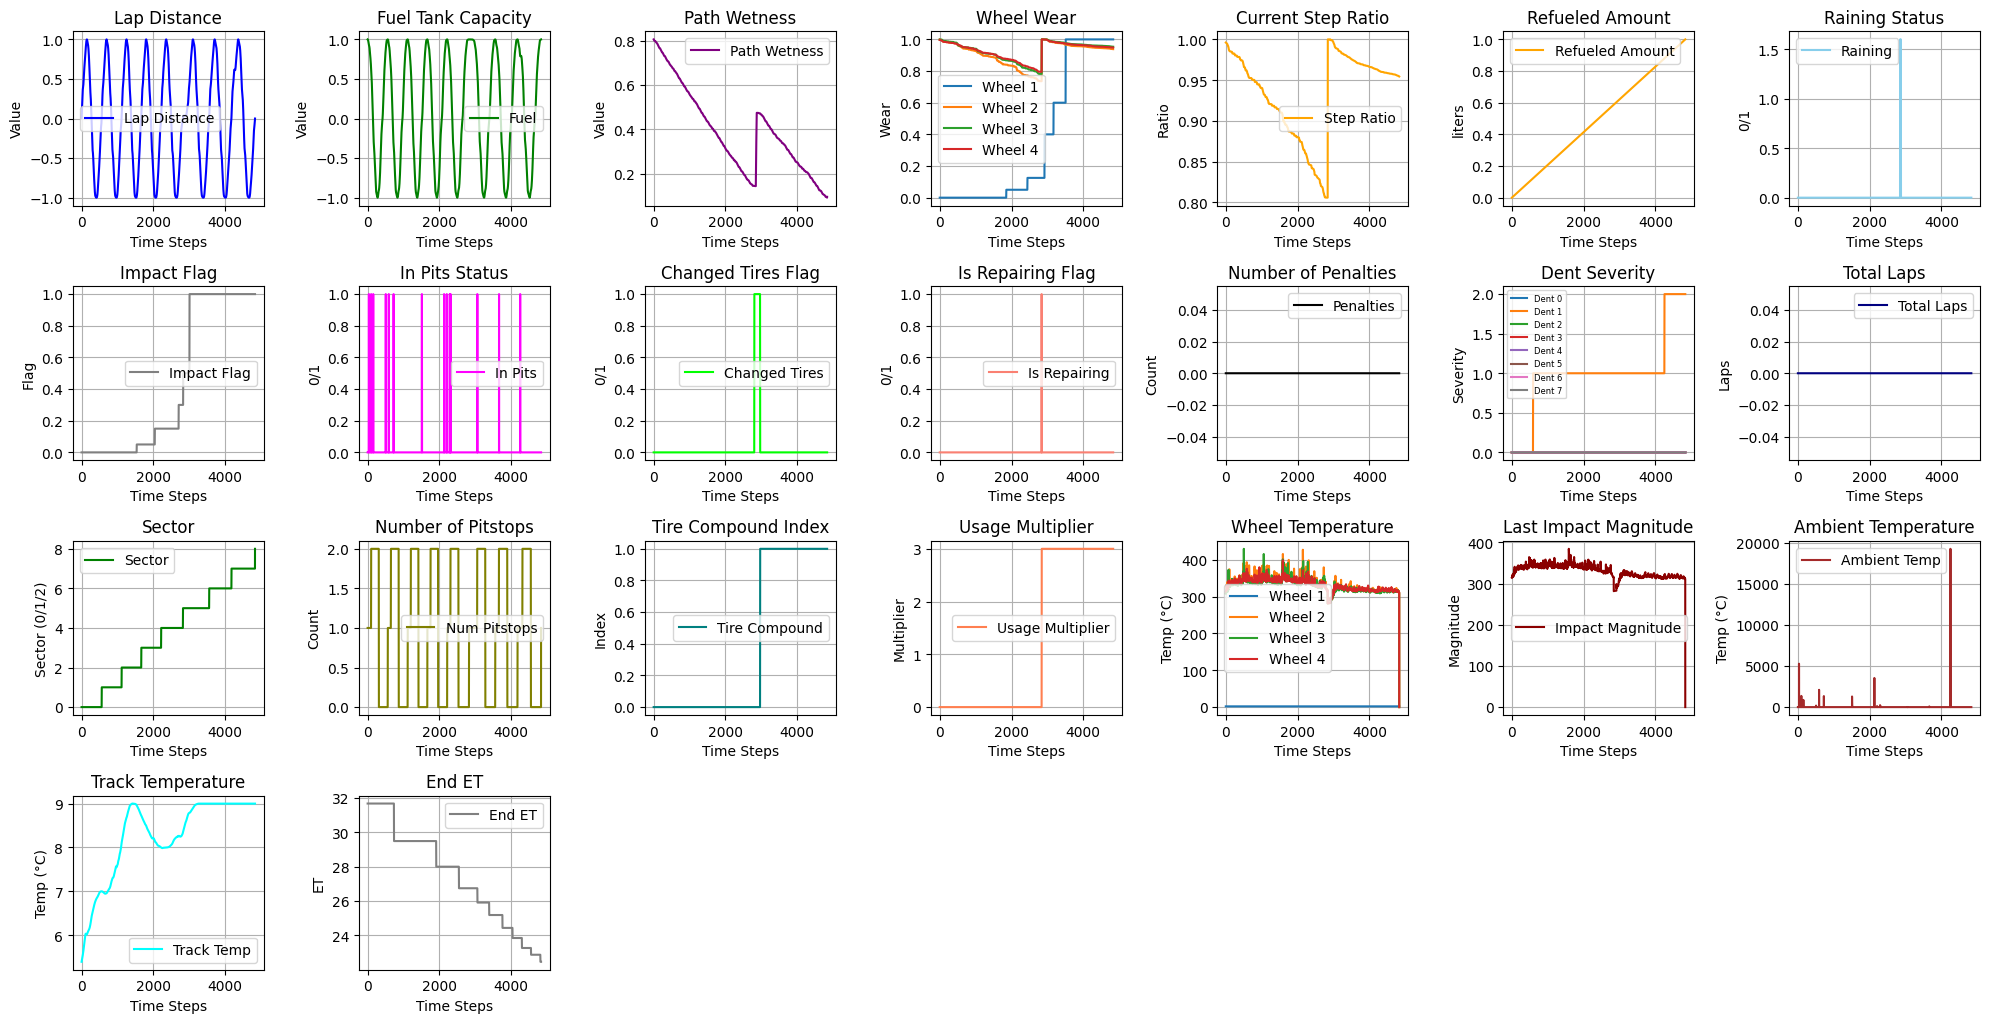

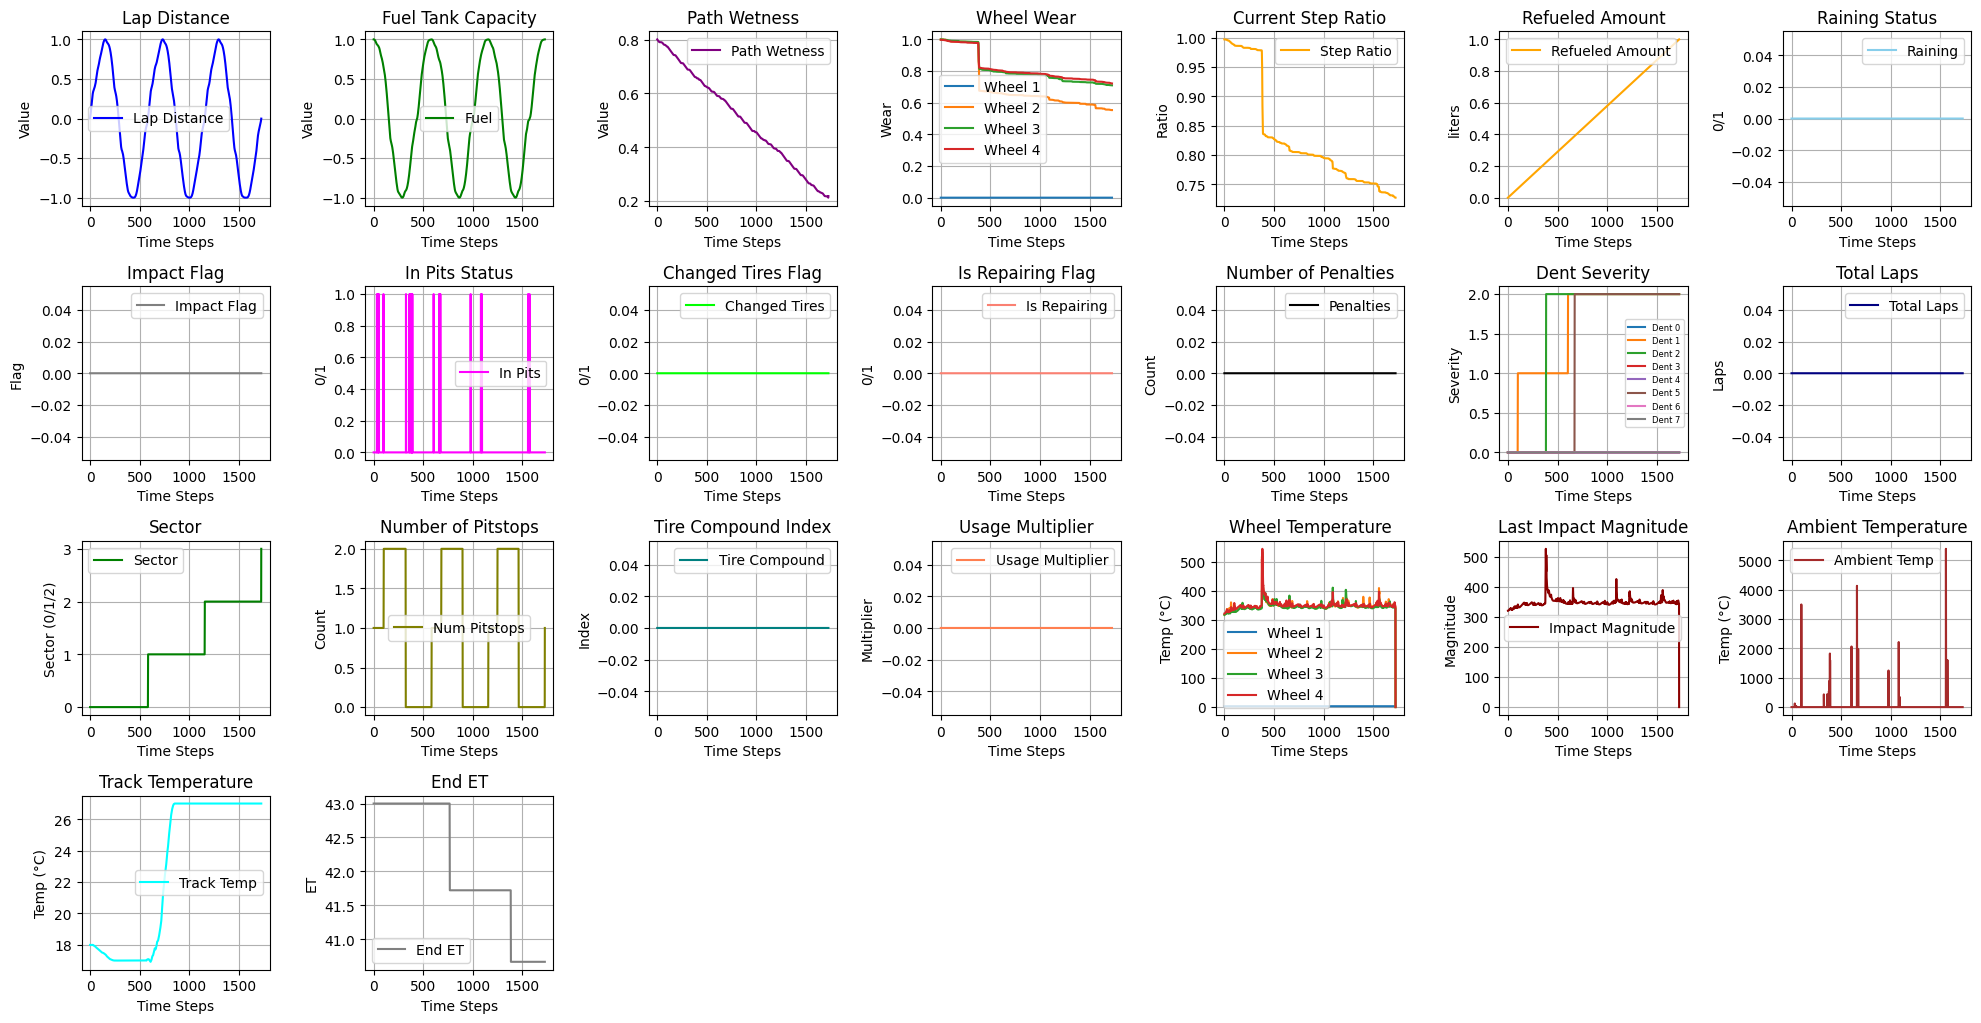

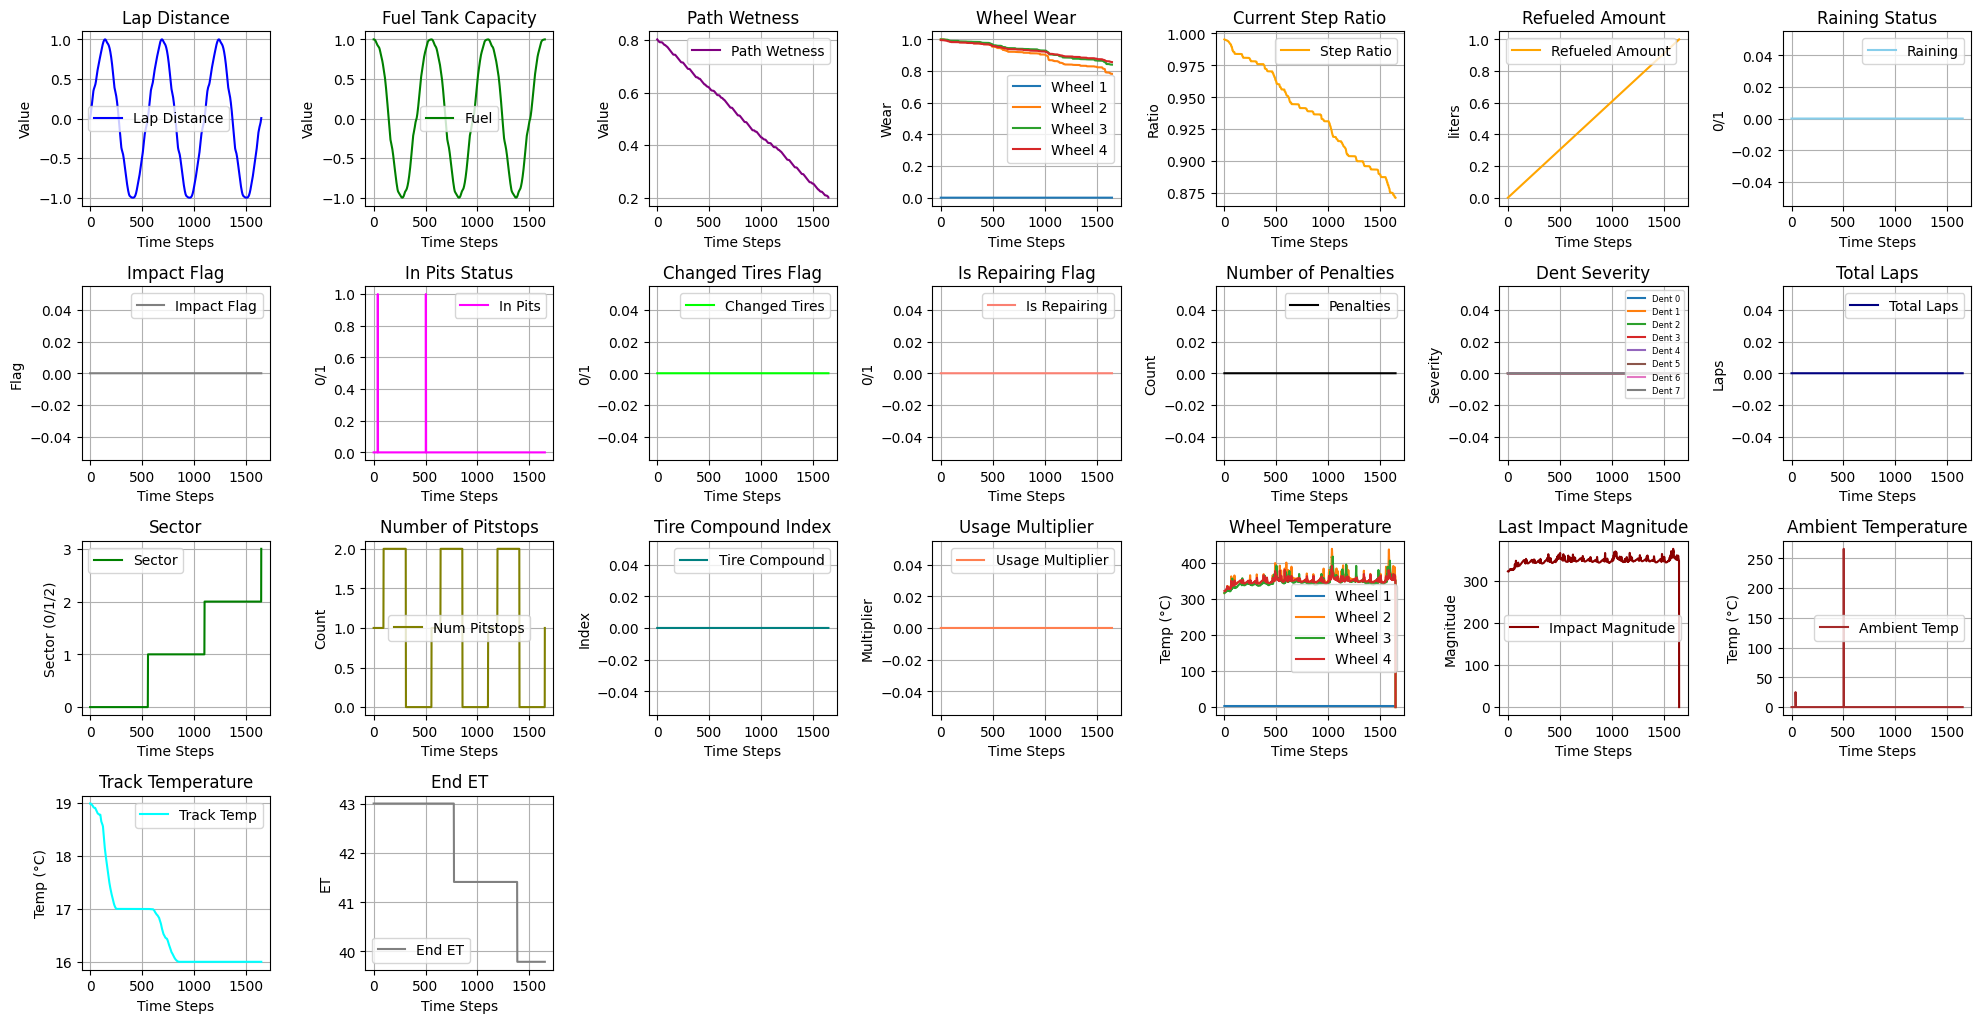

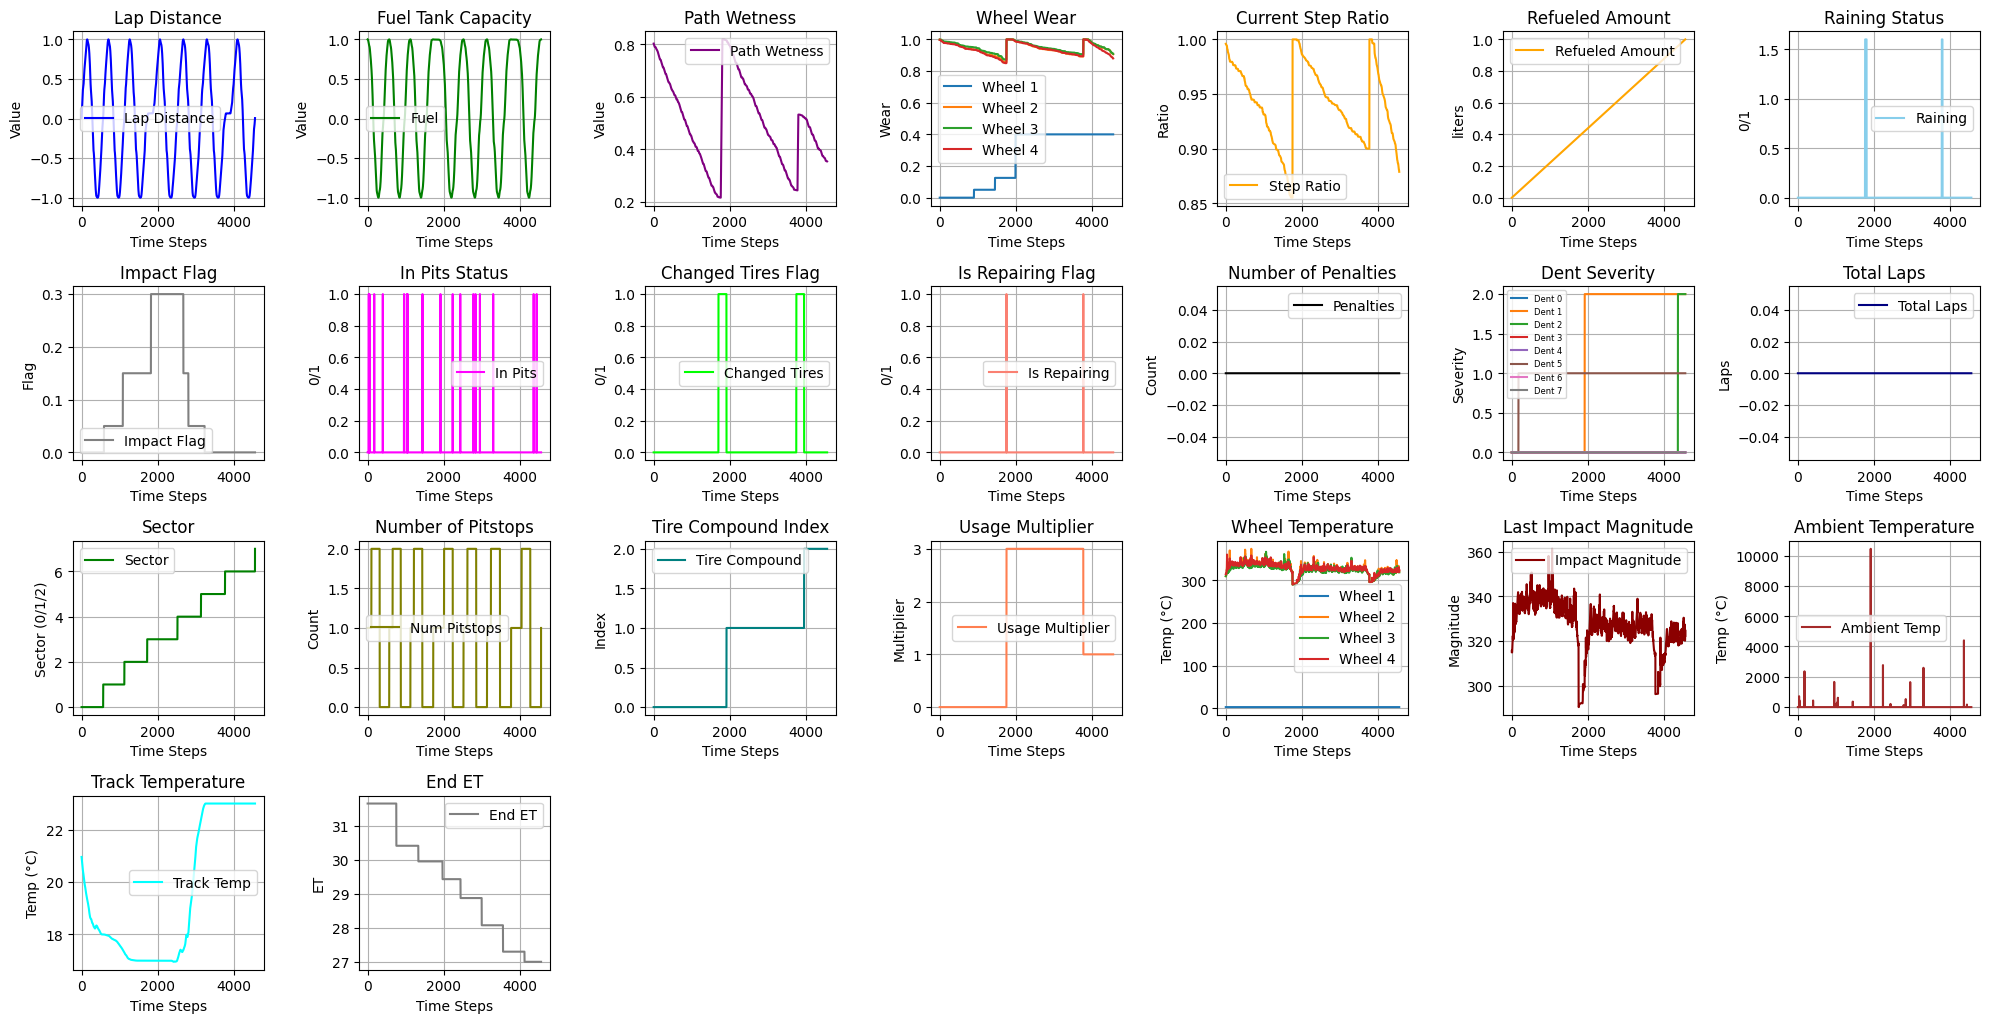

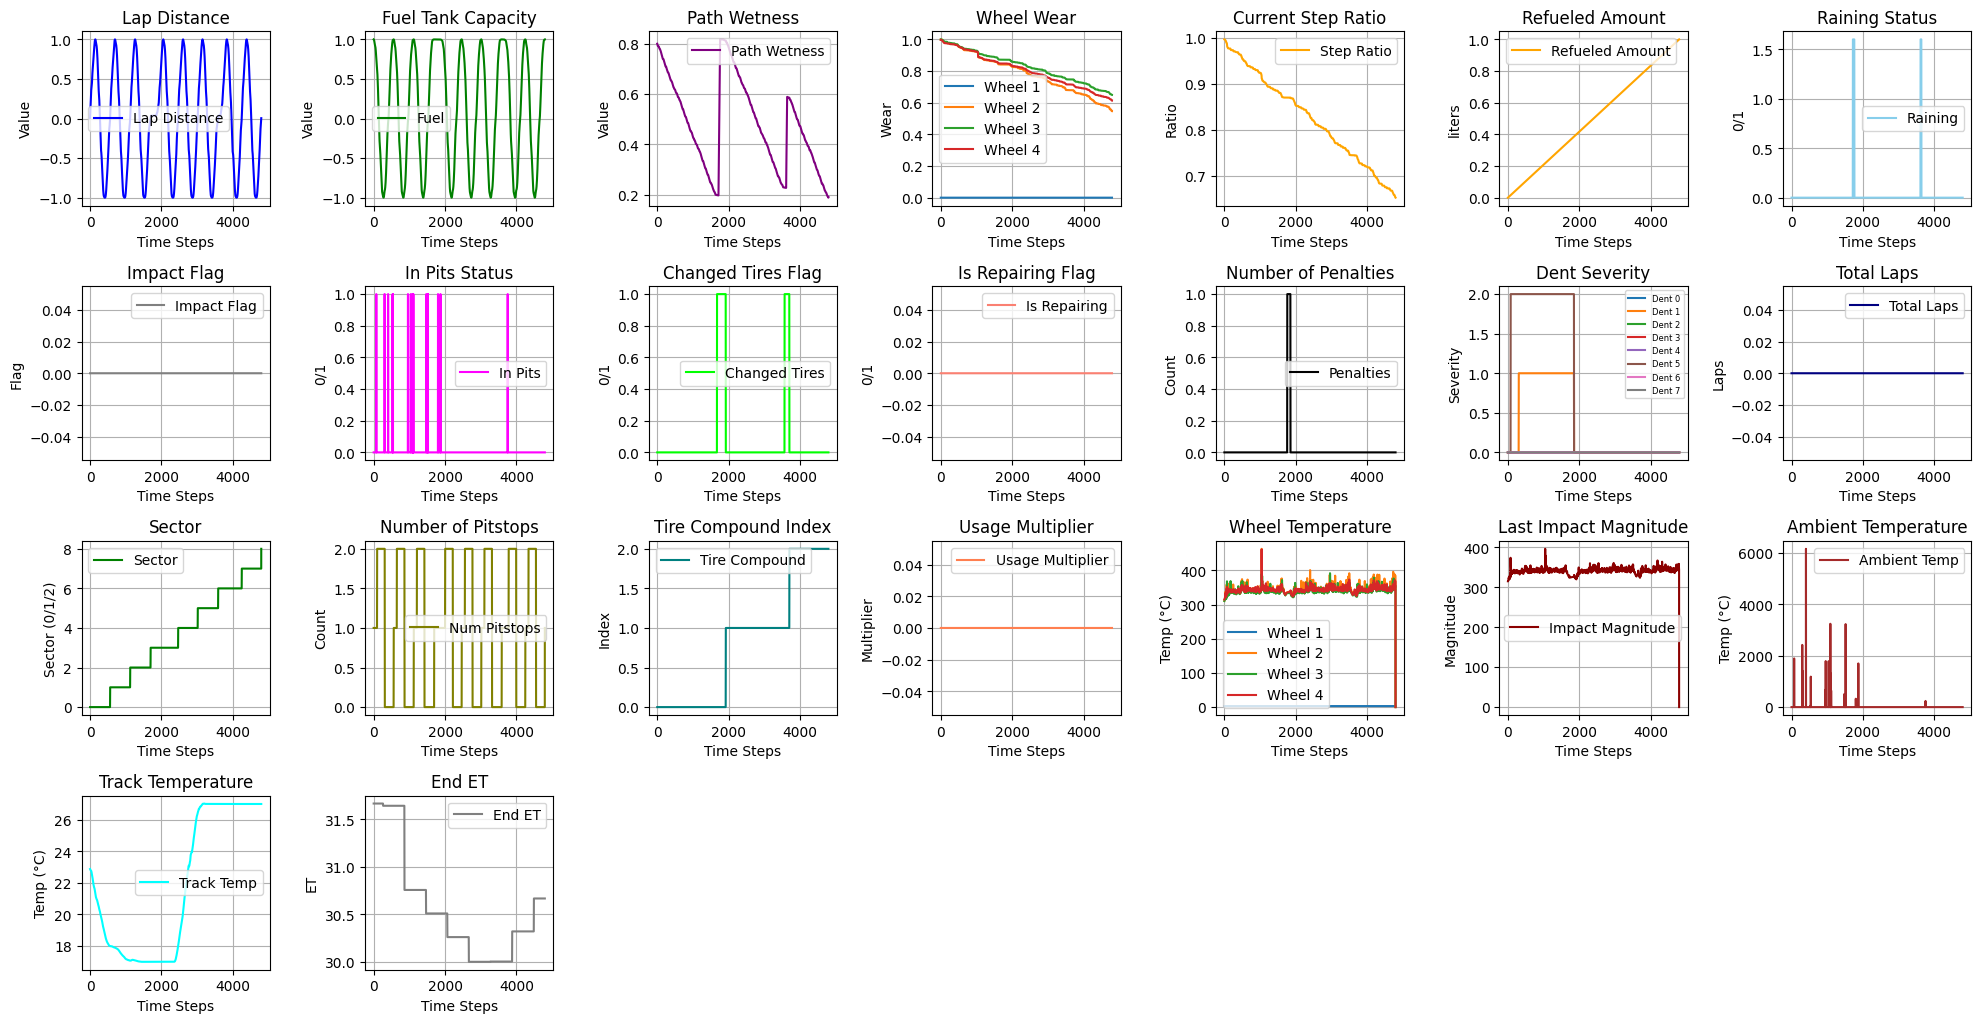

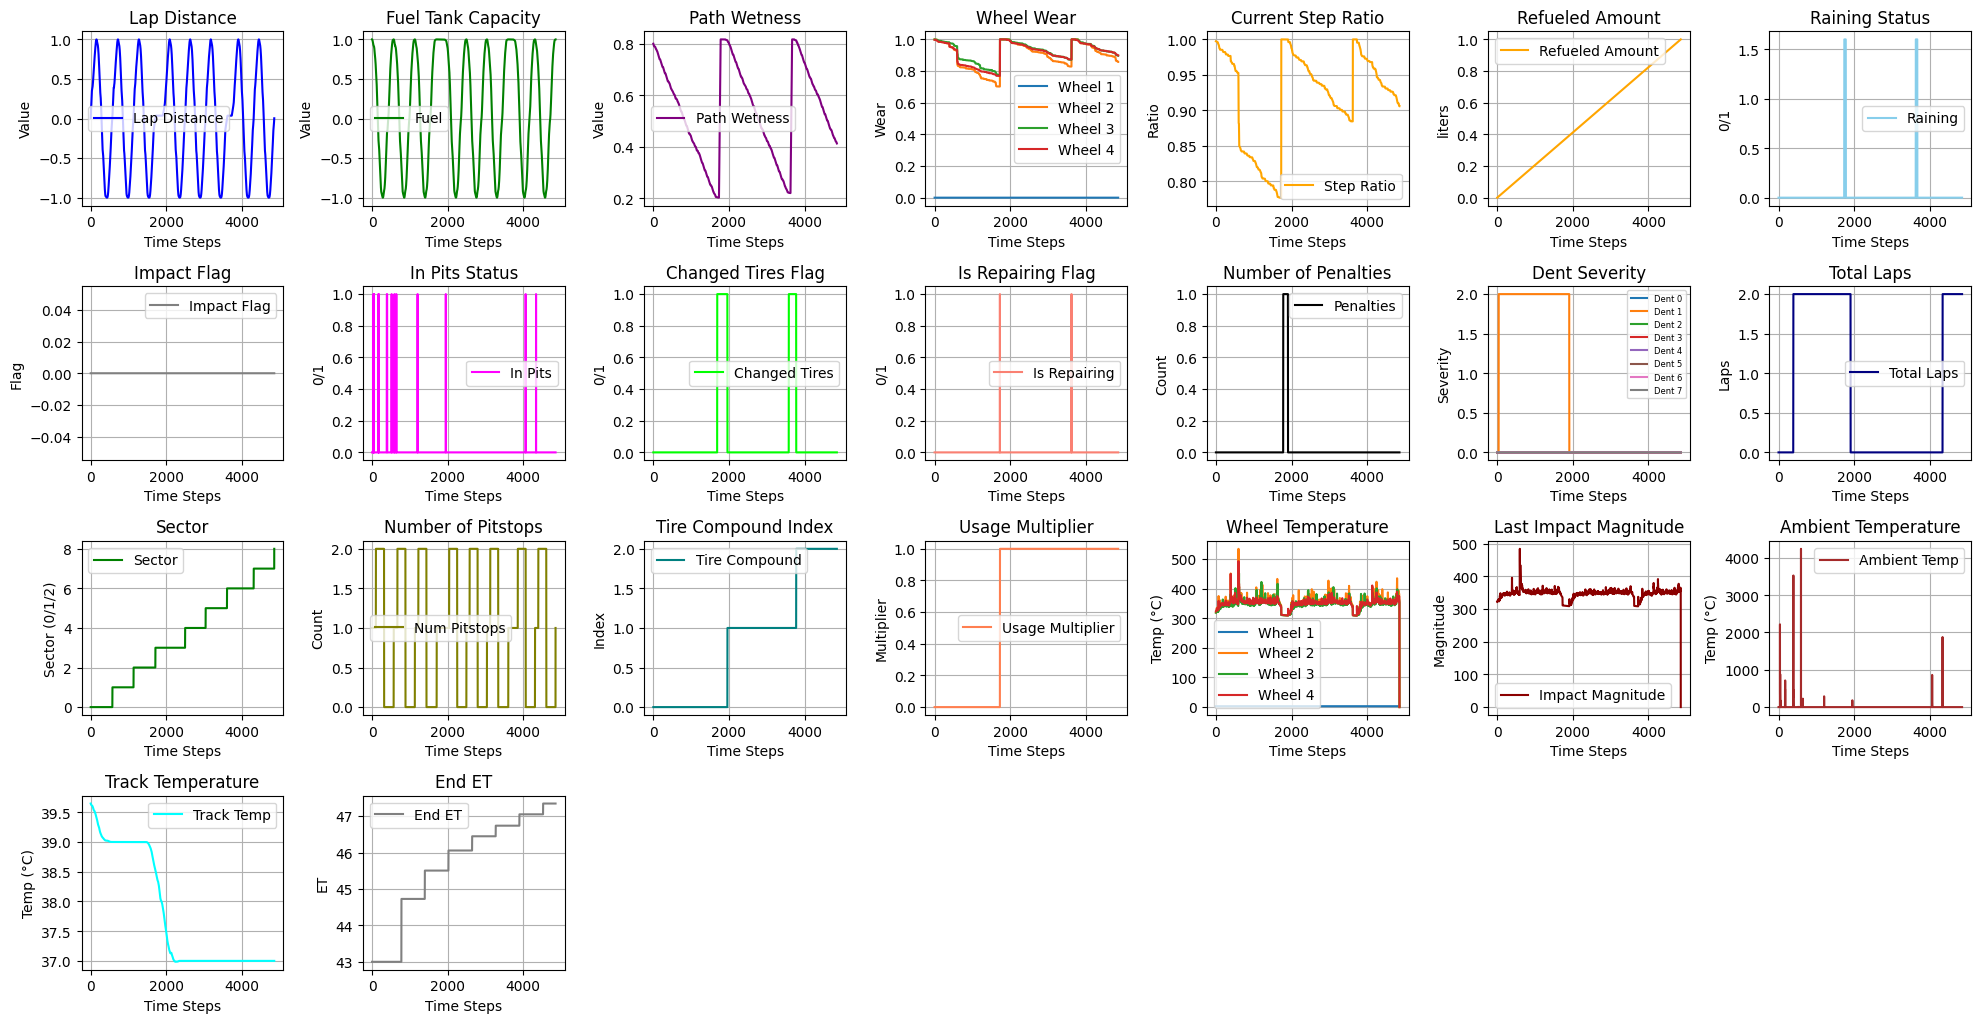

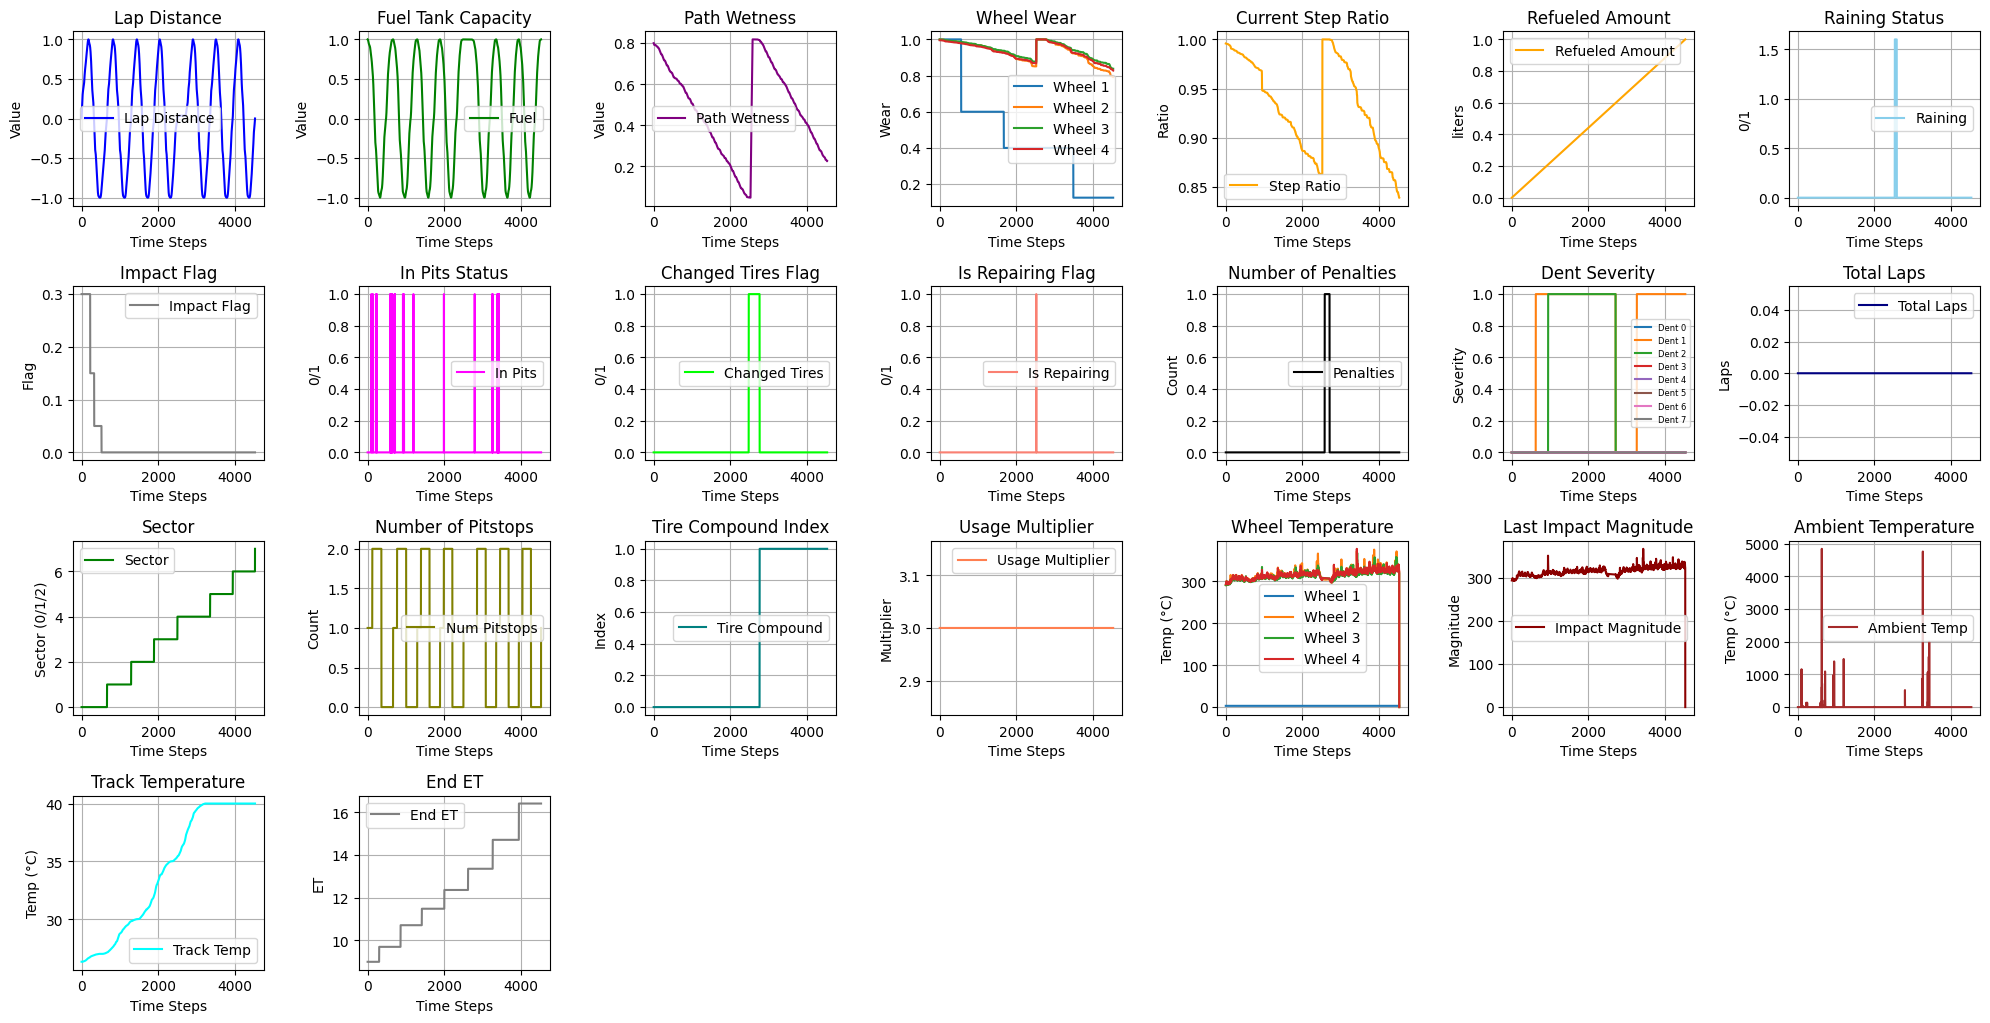

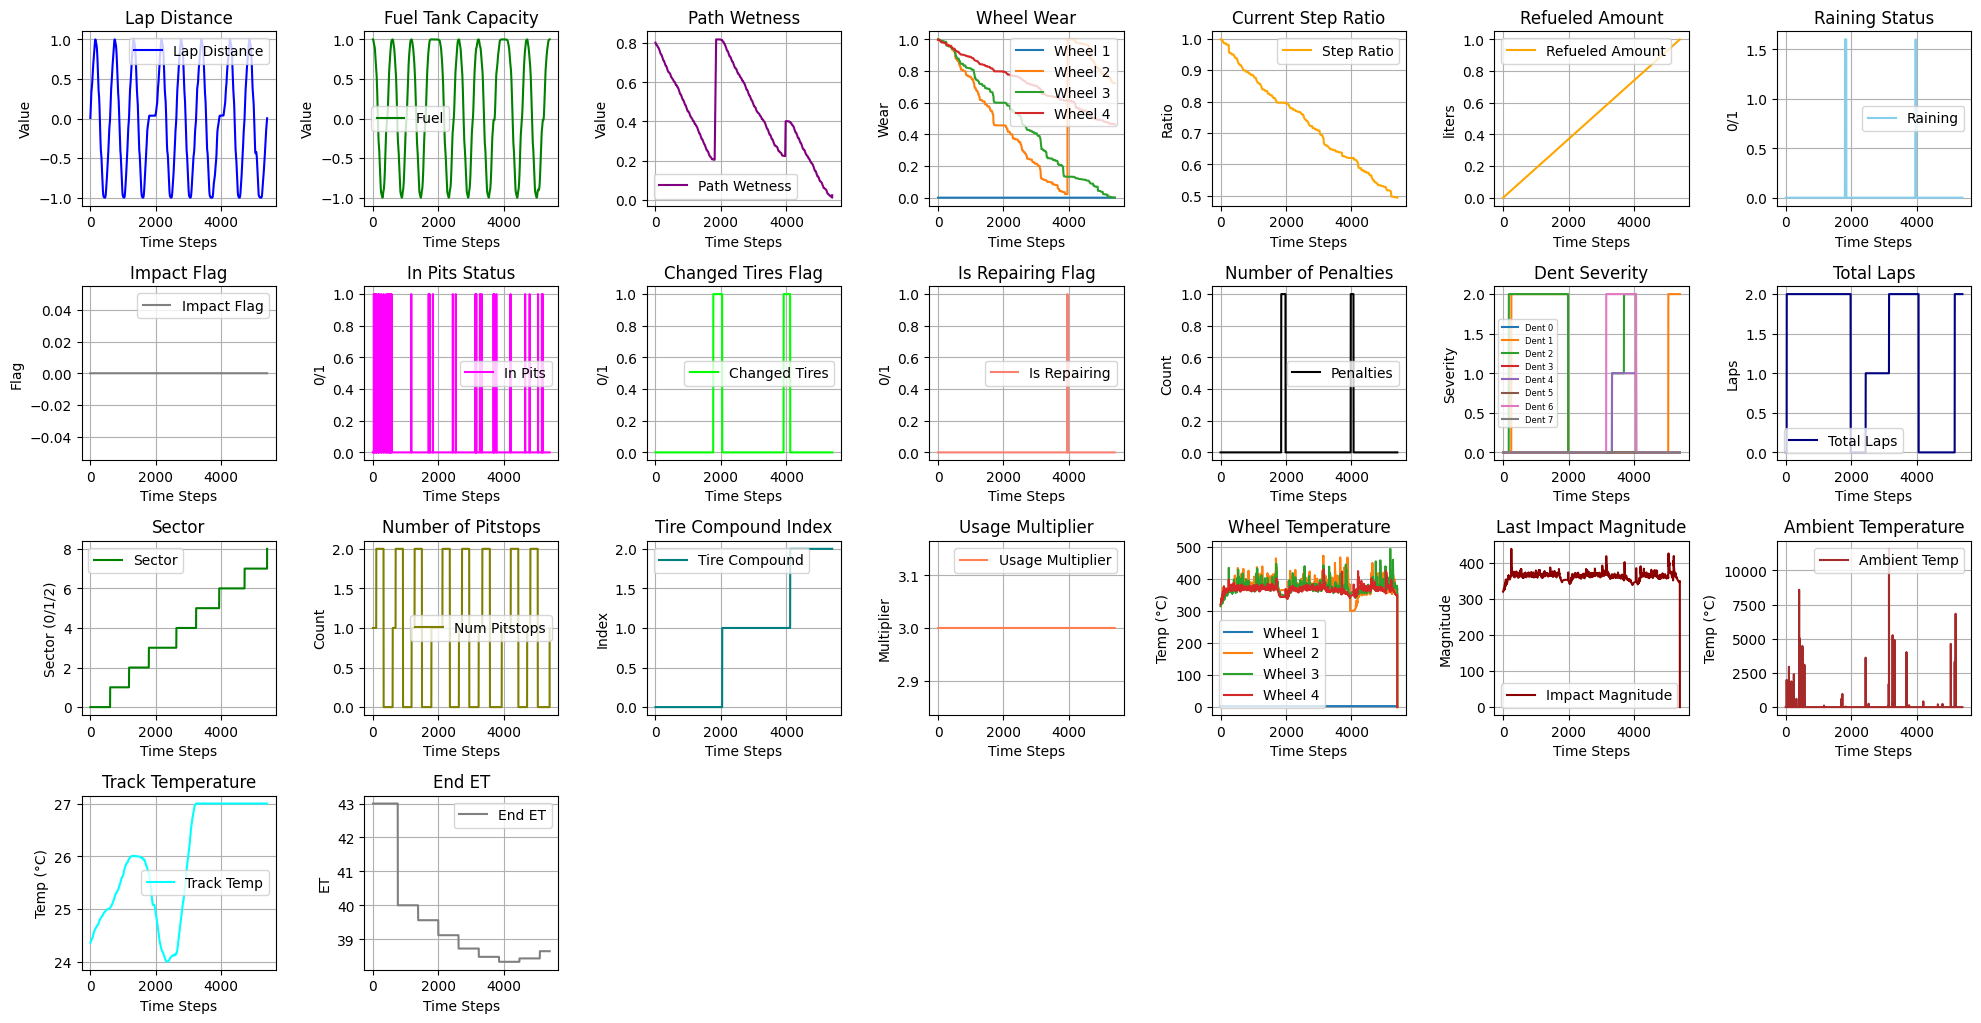

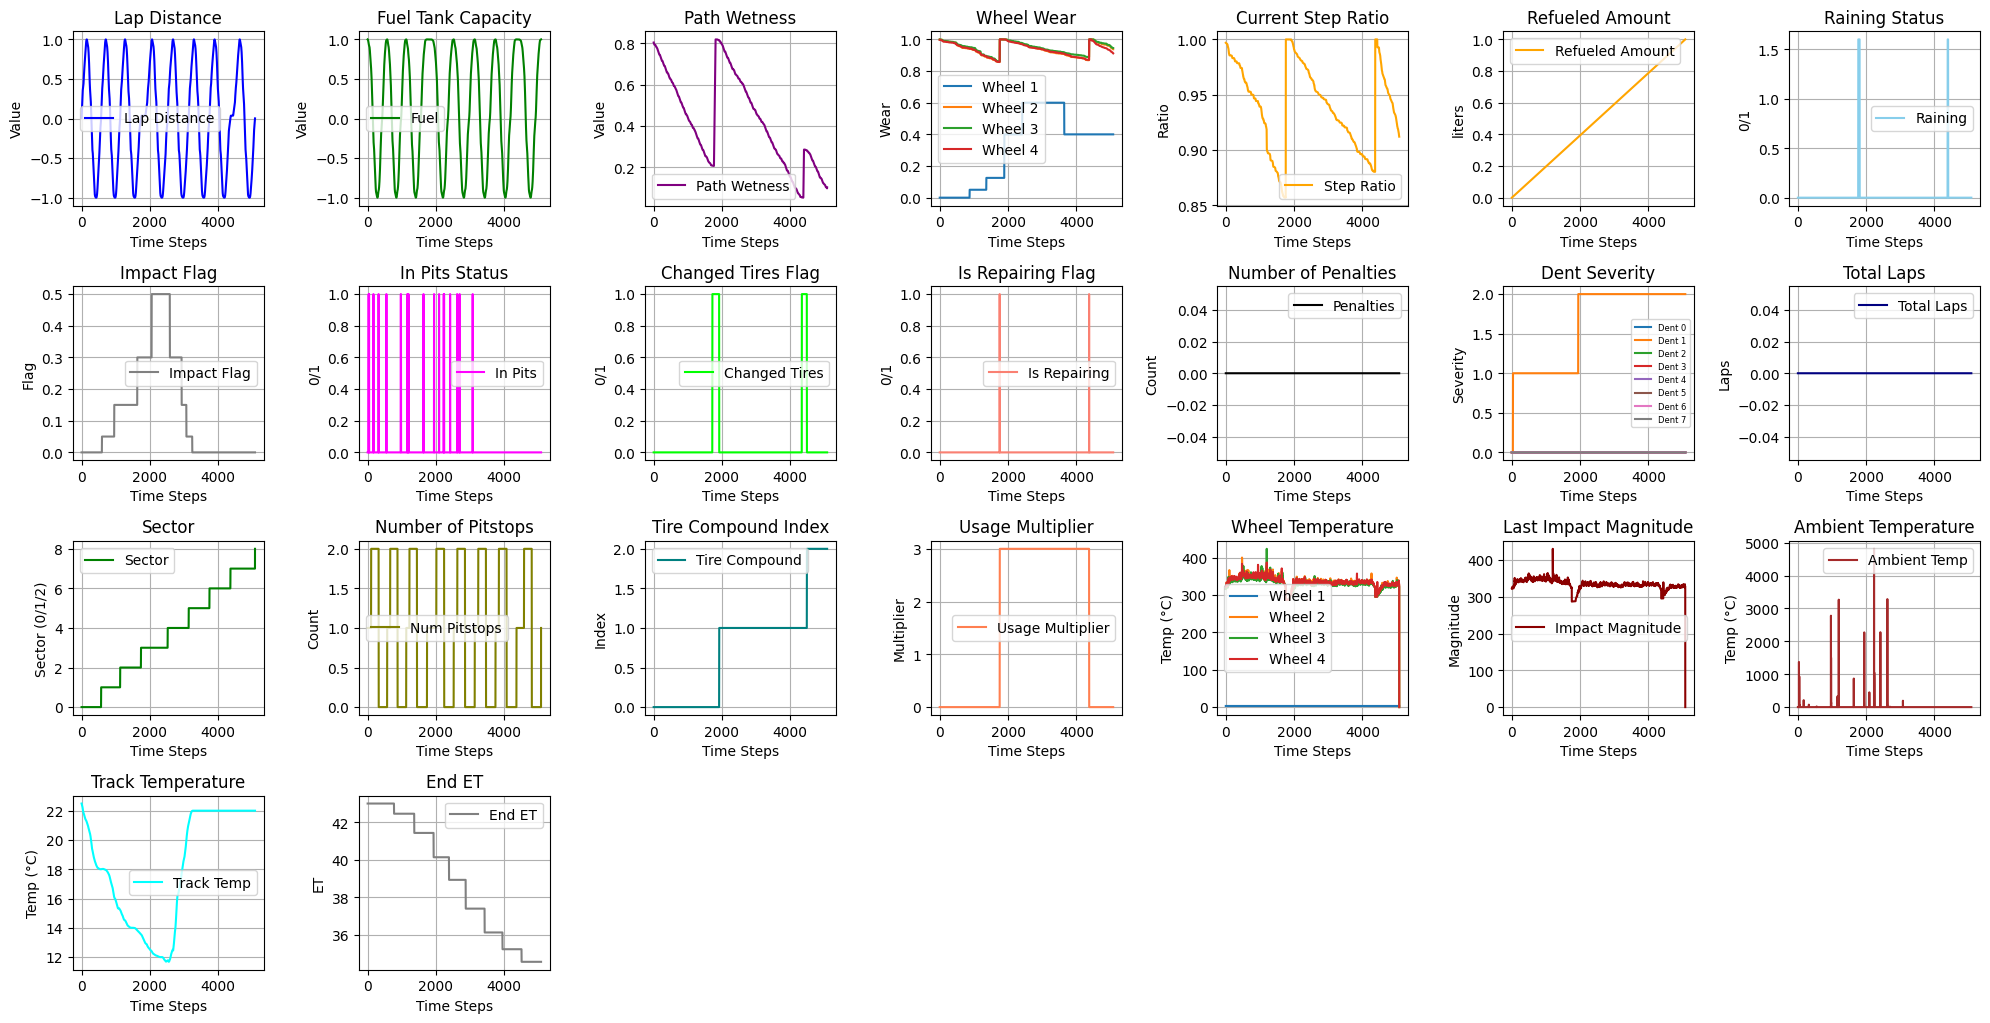

In [7]:
for race in data:
    make_plots(race)

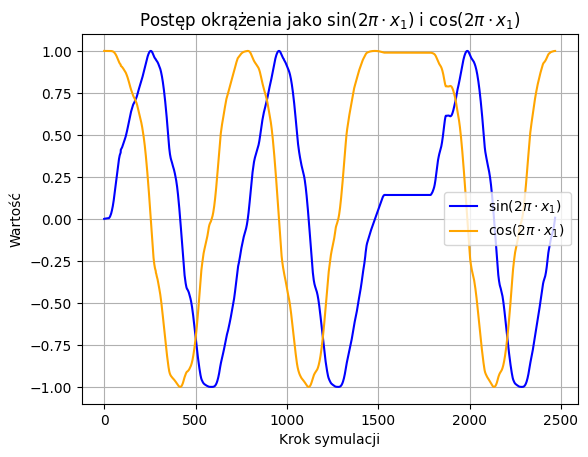

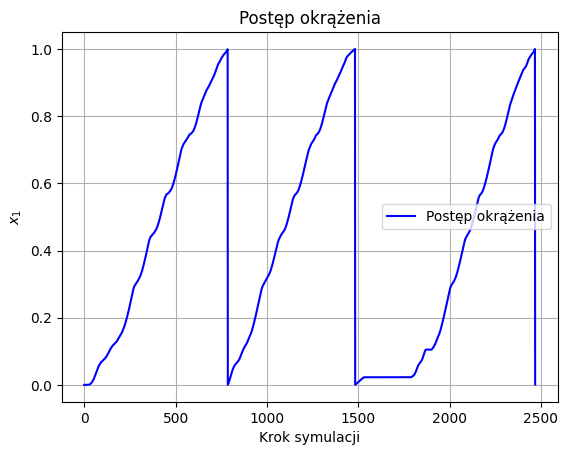

In [7]:
race_data = data[3]  # Wybierz pierwszy wyścig do analizy

history_array = np.array(race_data)
# for i in range(history_array.shape[0]):
    
#     LAP_DIST_norm = (np.atan2(history_array[i, 0],history_array[i, 1]) + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)

#     history_array[i] = np.hstack((LAP_DIST_norm, history_array[i, 2:]))
radians = np.atan2(history_array[:, 0], history_array[:, 1]) 

# Normalize
LAP_DIST_norm_col = (radians + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)

# Reshape to make it a column vector (N, 1)
LAP_DIST_norm_col = LAP_DIST_norm_col.reshape(-1, 1)

# 2. Horizontal stack the new column with the sliced original data
# This creates a NEW array with 38 columns (1 new + 37 old)

# Utworzenie większej figury dla wszystkich wykresów
# fig = plt.figure(figsize=(20, 15))

# 1. Lap Distance
# plt.subplot(6, 7, 1)
plt.plot(history_array[:, 0], label=r'$\sin(2\pi \cdot x_1)$', color='blue')
plt.plot(history_array[:, 1], label=r'$\cos(2\pi \cdot x_1)$', color='orange')

# Tytuł też musi mieć dolary obejmujące komendy \cdot i \pi
plt.title(r'Postęp okrążenia jako $\sin(2\pi \cdot x_1)$ i $\cos(2\pi \cdot x_1)$')
plt.xlabel('Krok symulacji')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(LAP_DIST_norm_col, label='Postęp okrążenia', color='blue')
plt.title('Postęp okrążenia')
plt.xlabel('Krok symulacji')
plt.ylabel(r'$x_1$')
plt.legend()
plt.grid(True)
plt.show()

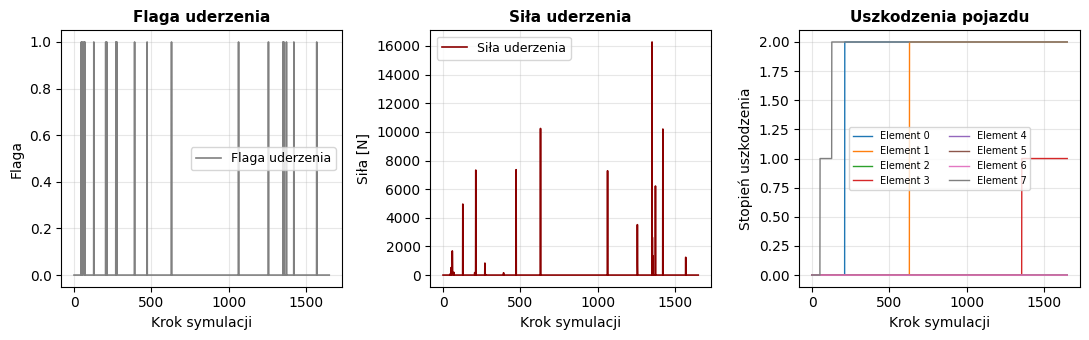

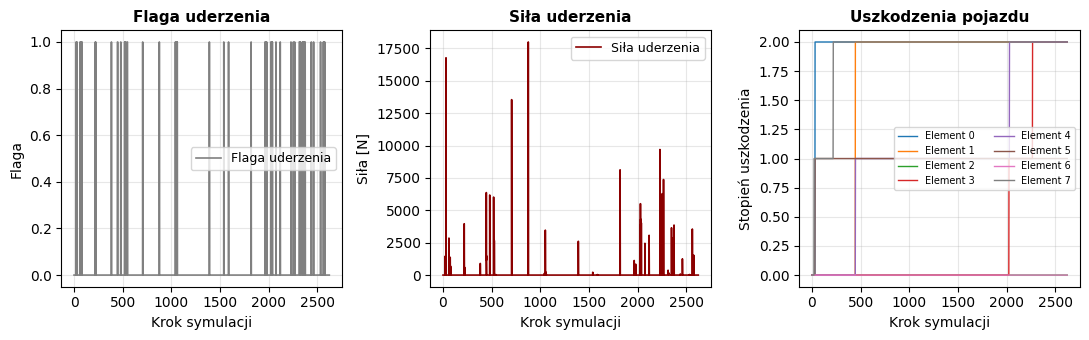

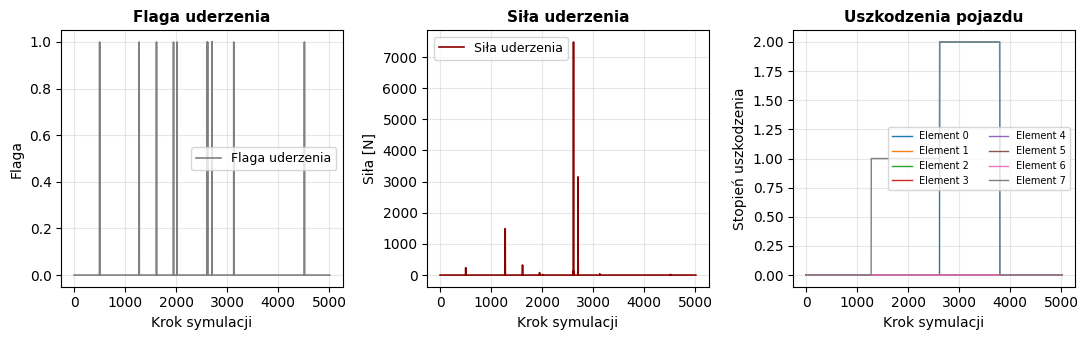

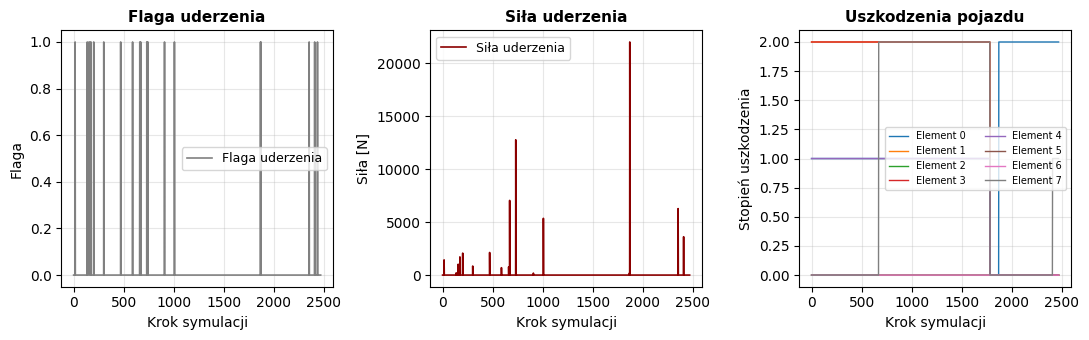

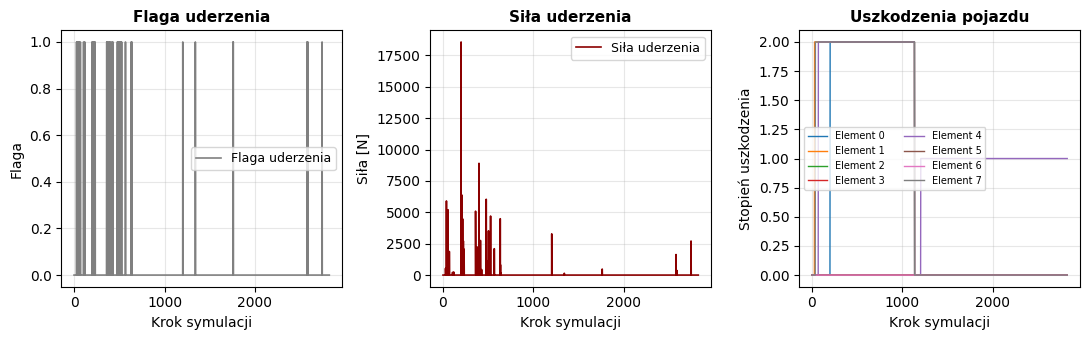

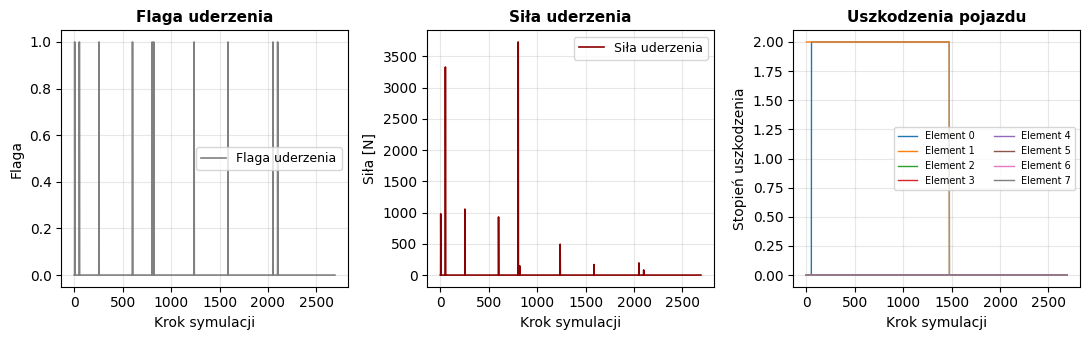

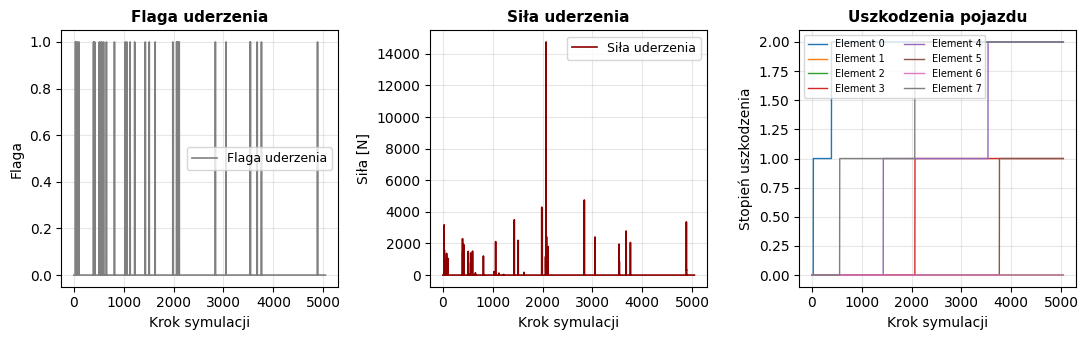

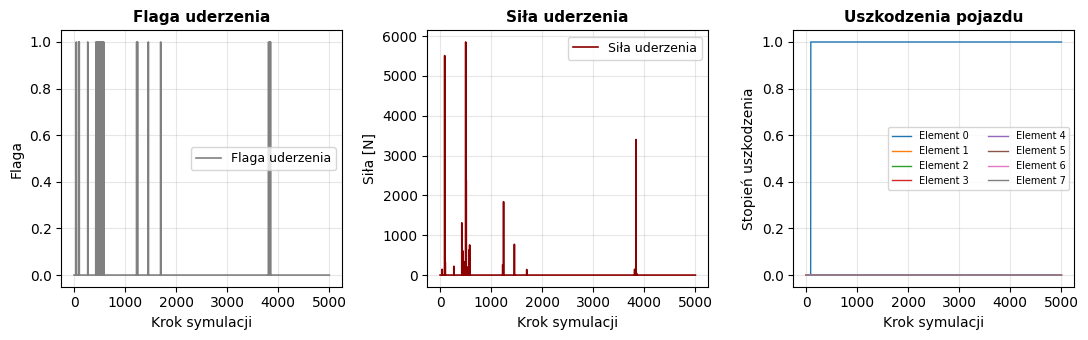

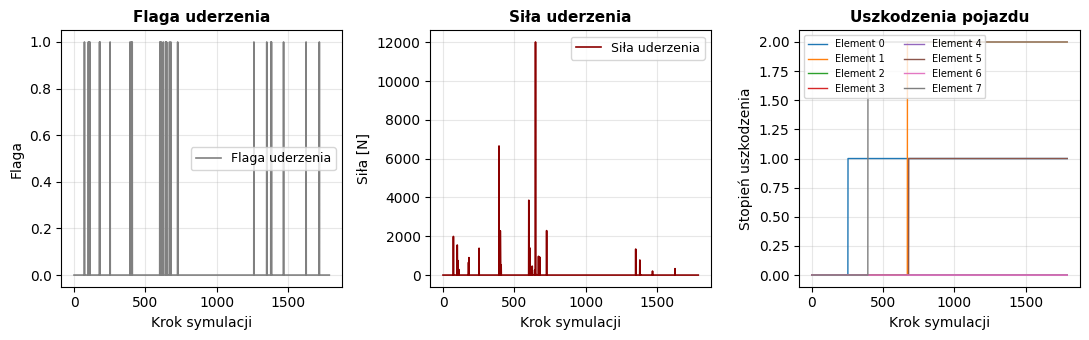

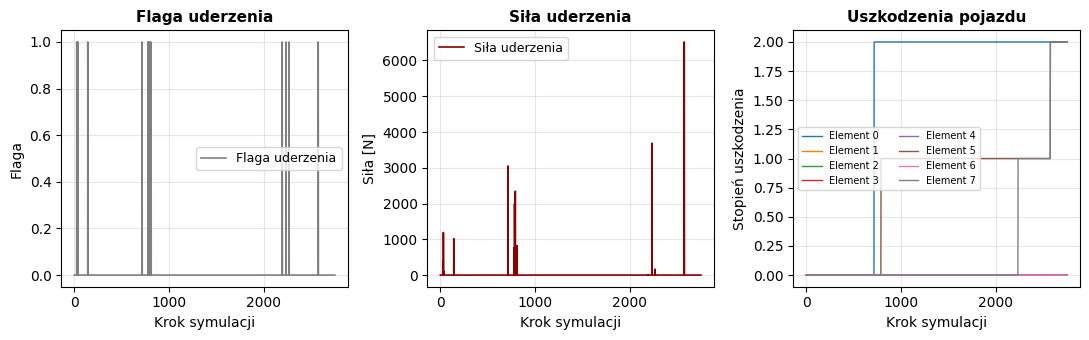

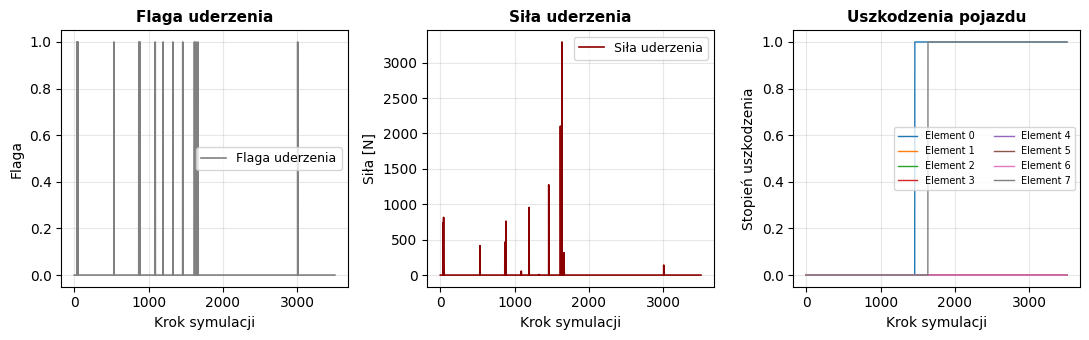

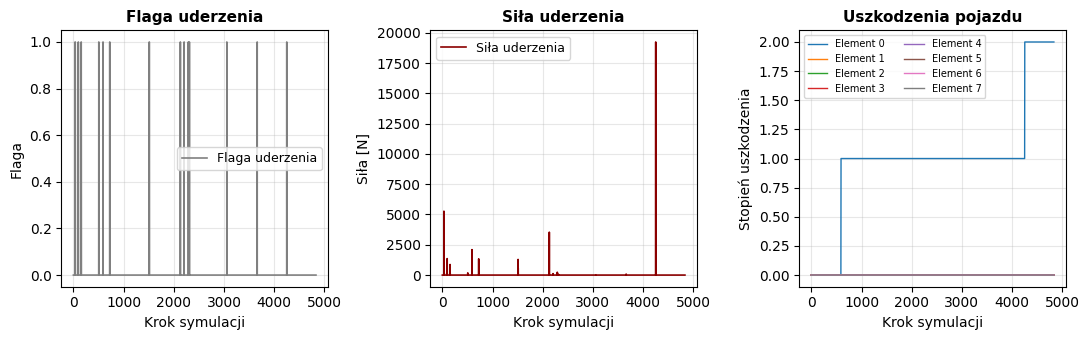

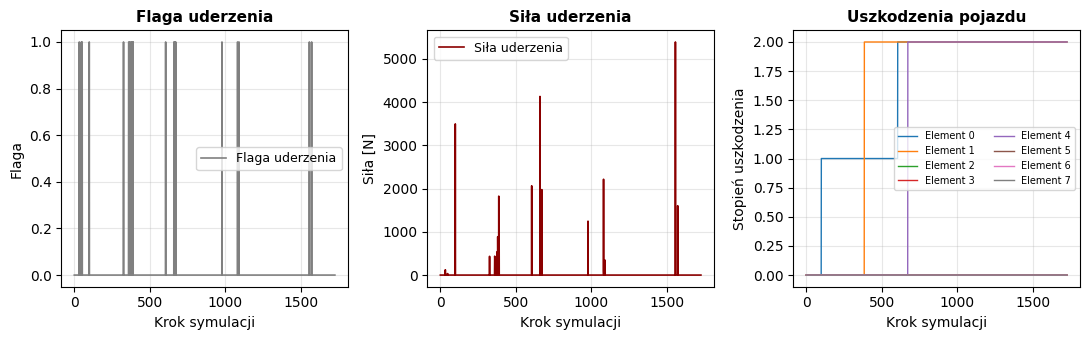

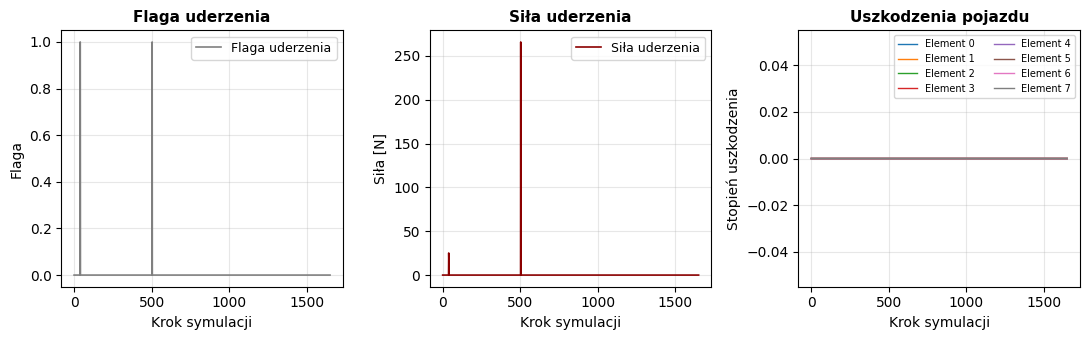

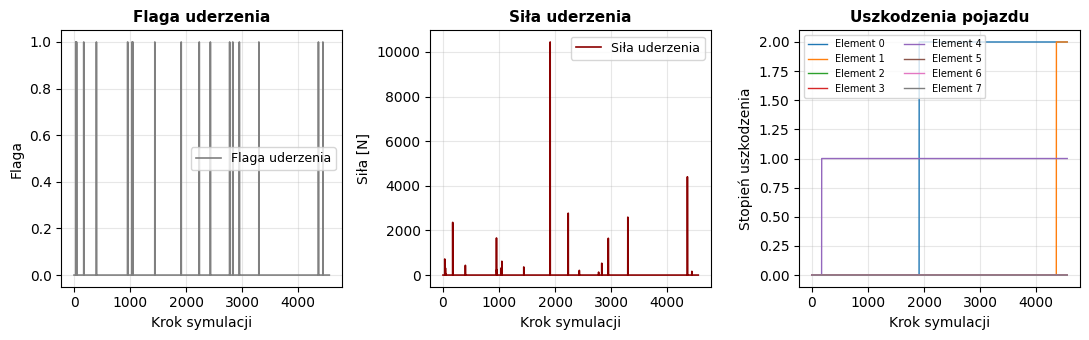

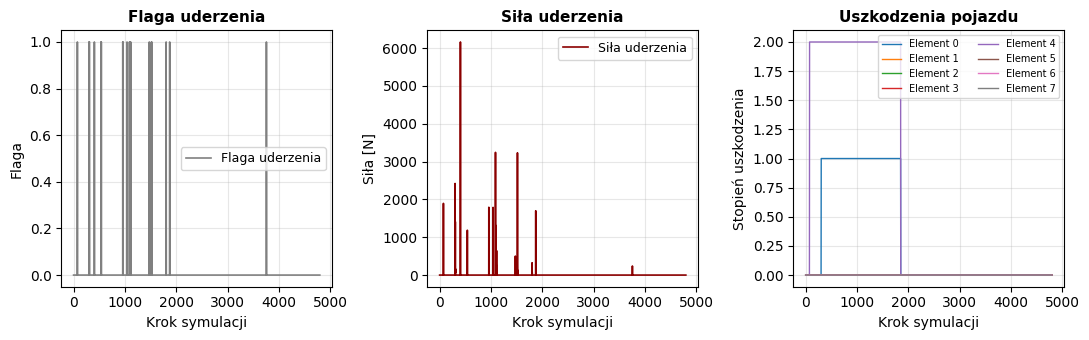

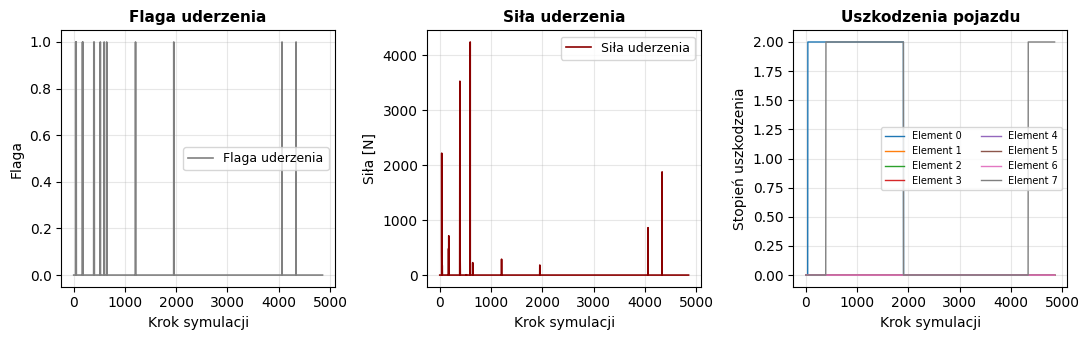

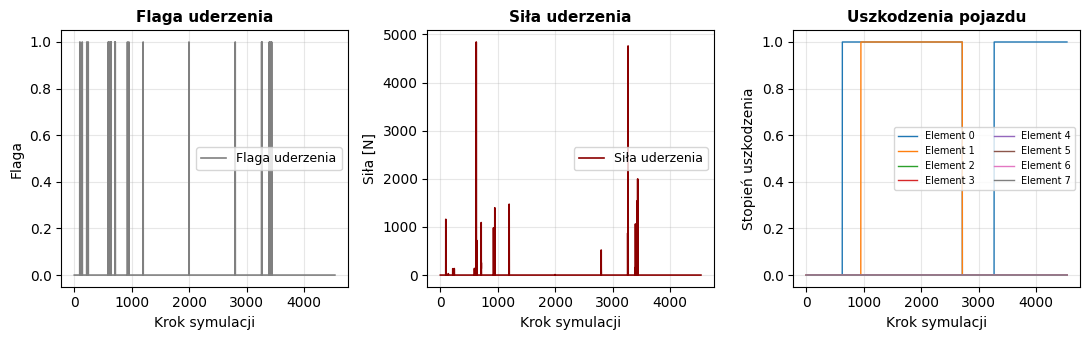

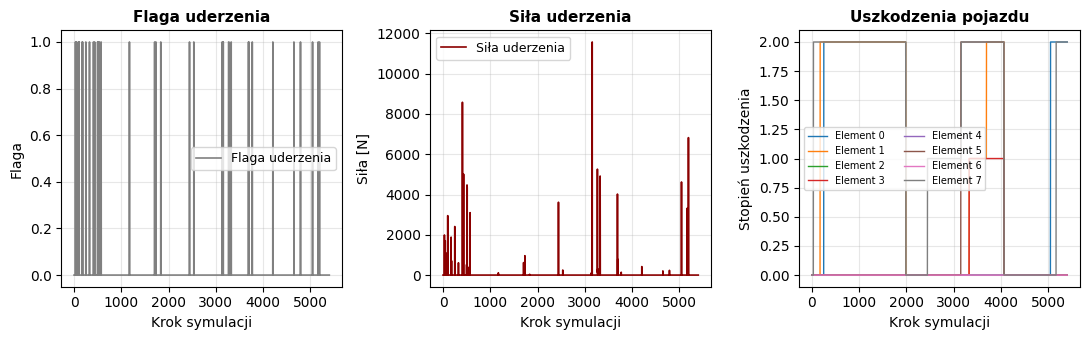

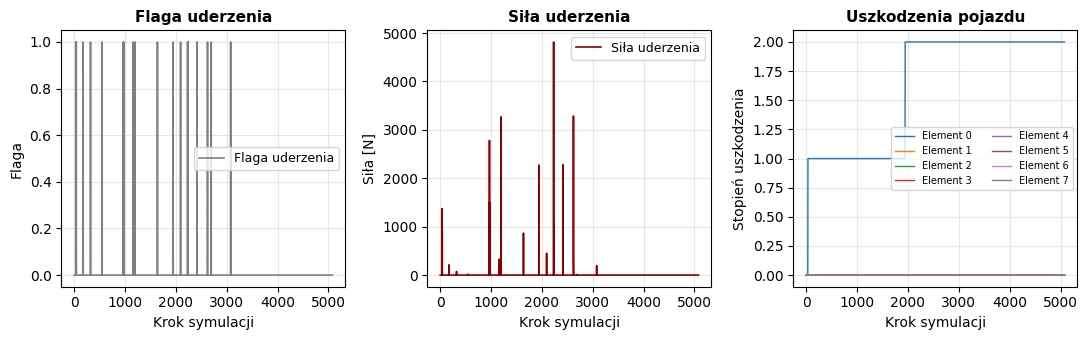

In [5]:
for race in data:
    make_plots_impacts(race)

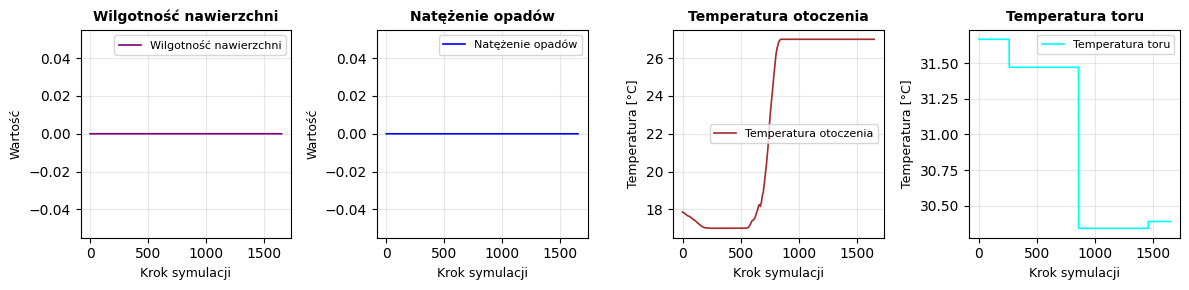

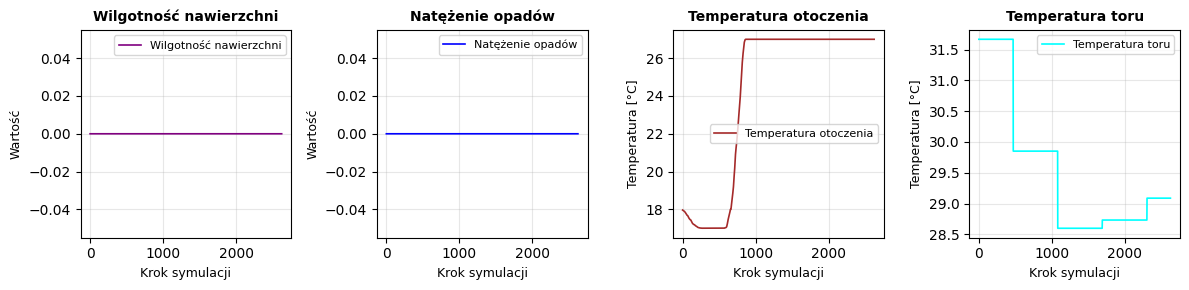

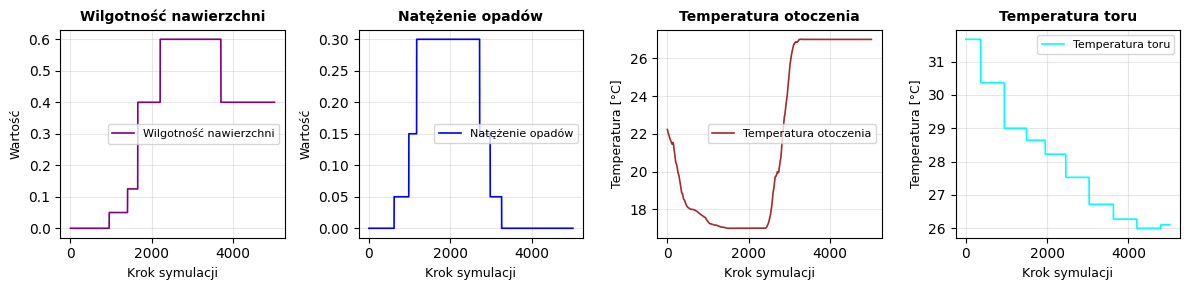

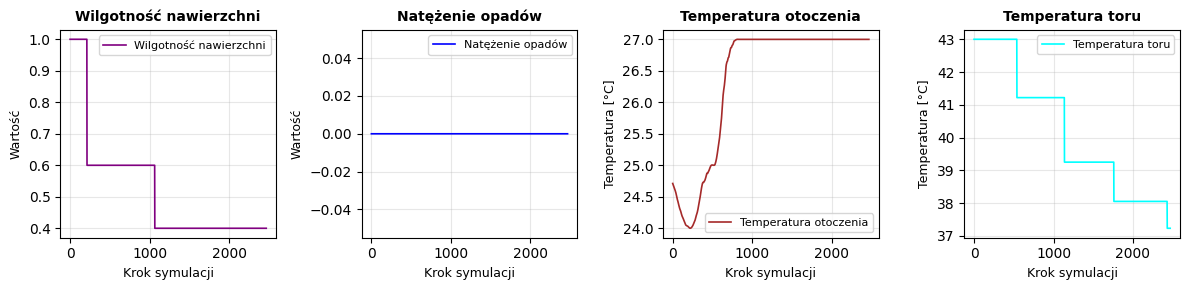

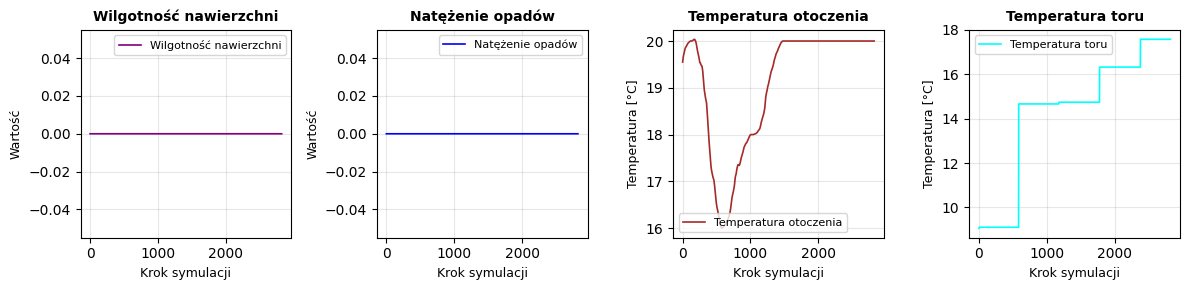

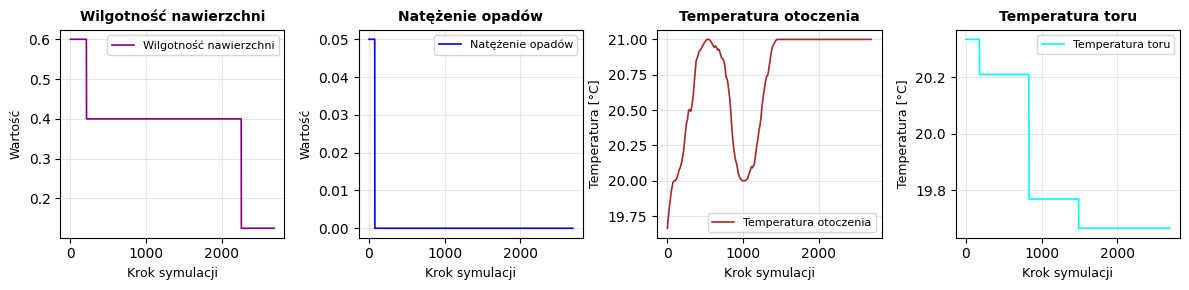

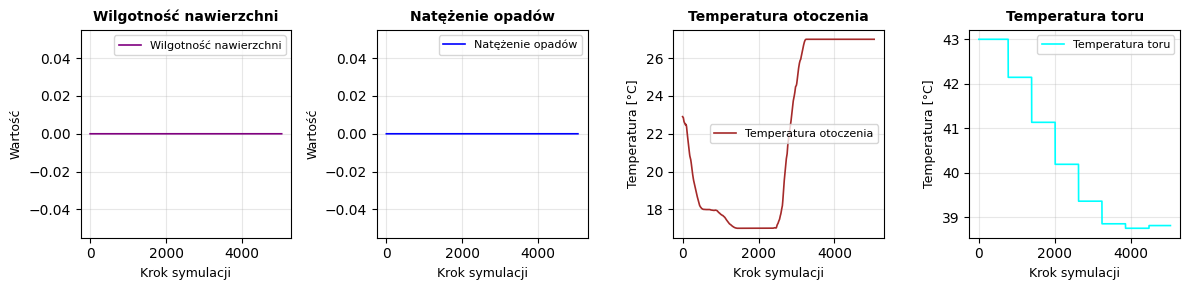

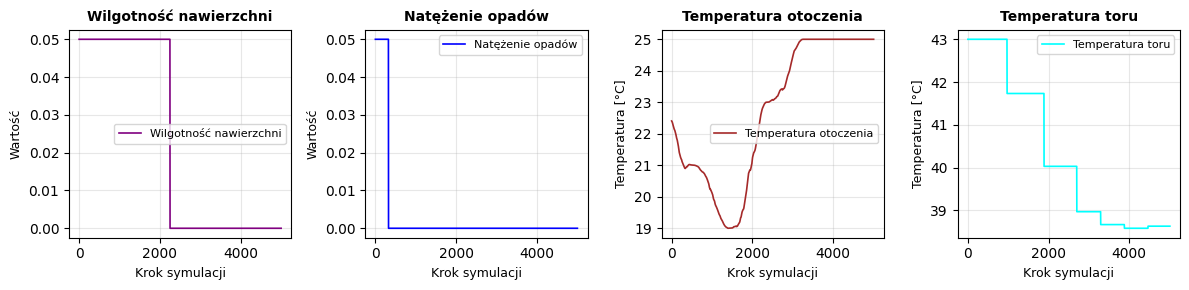

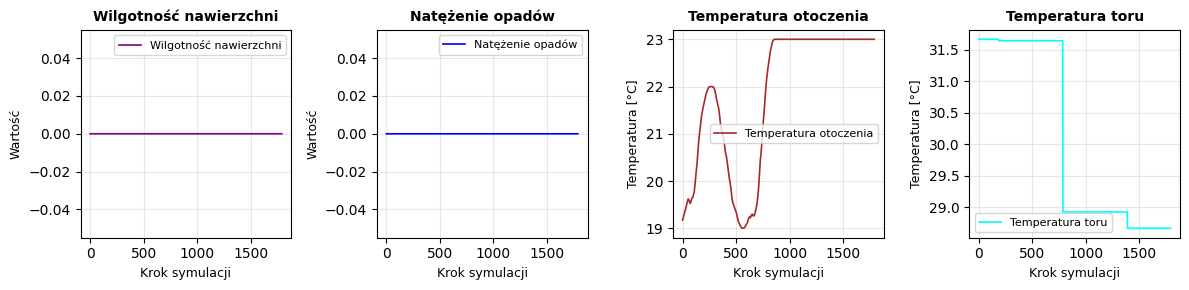

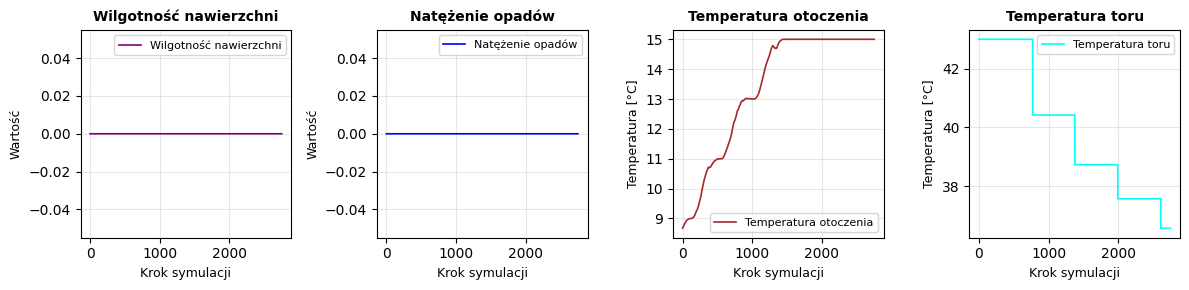

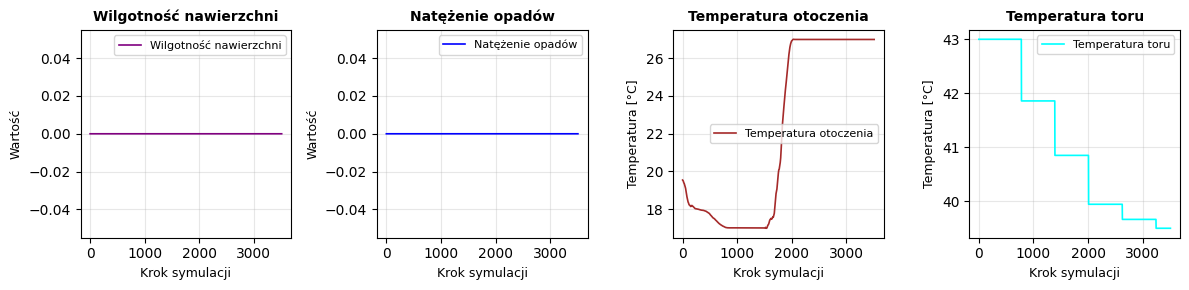

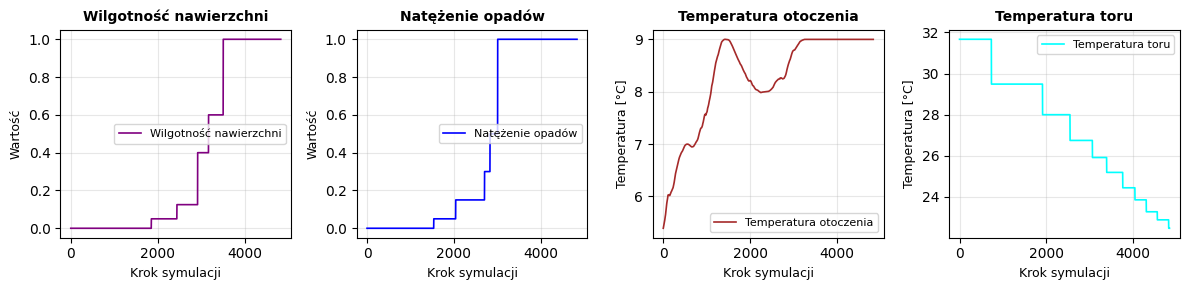

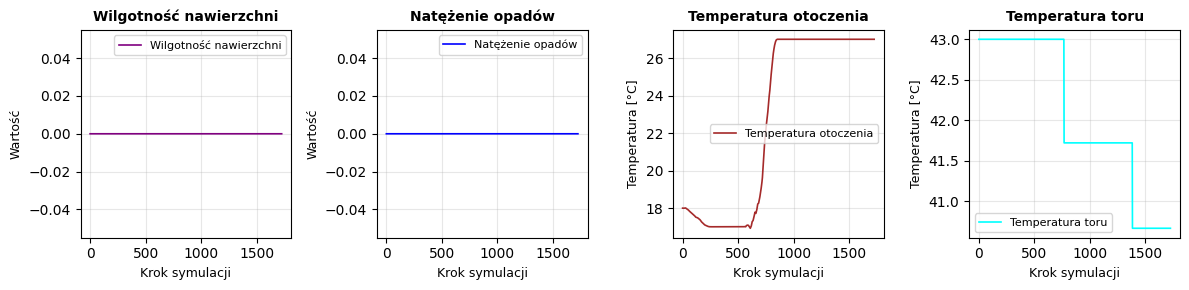

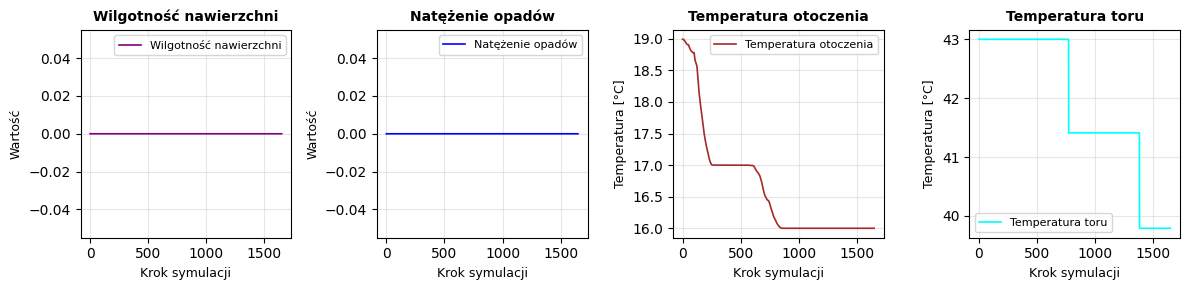

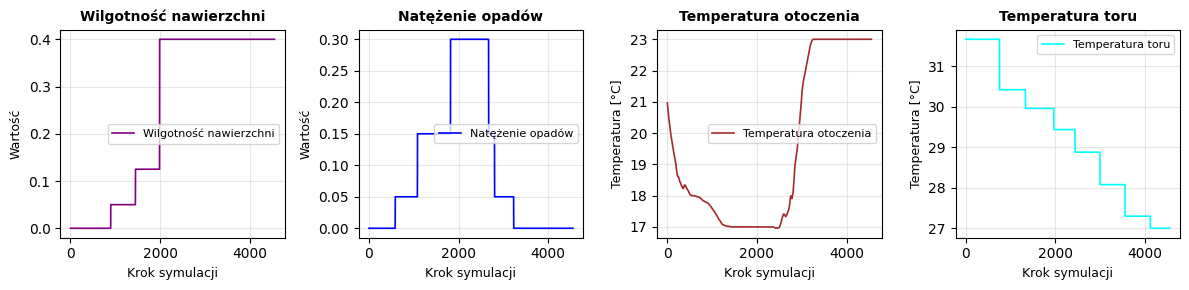

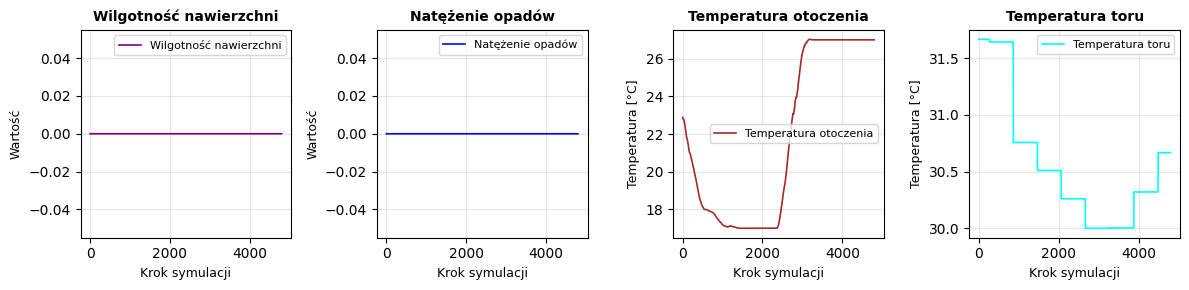

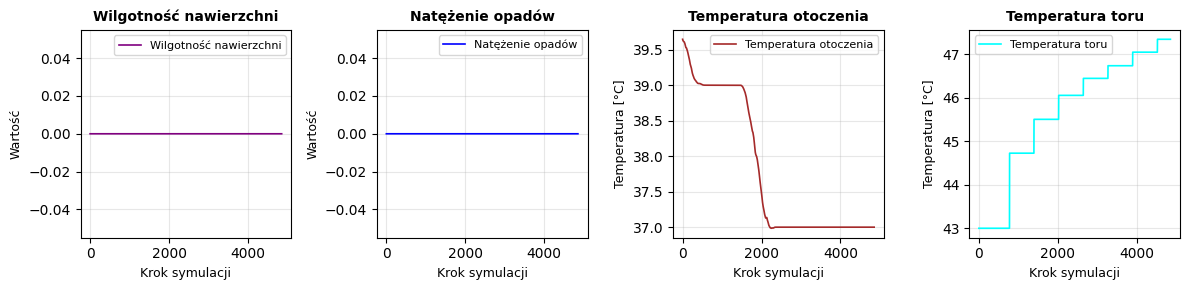

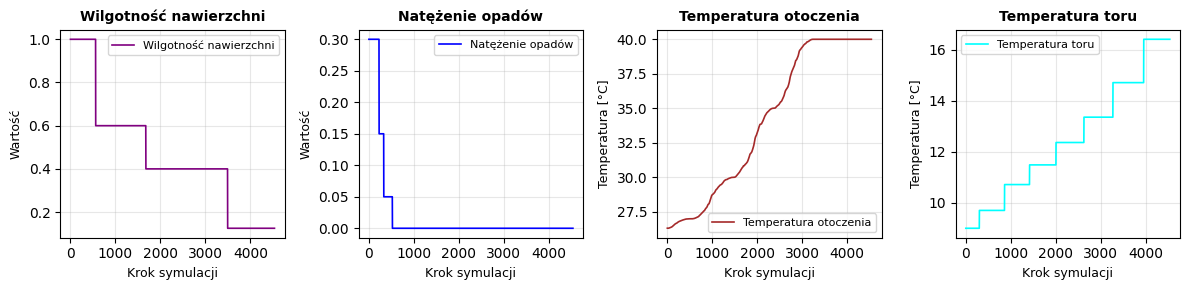

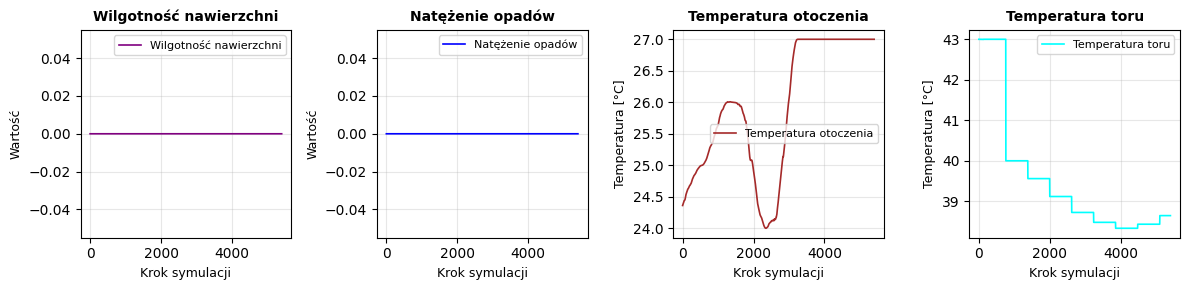

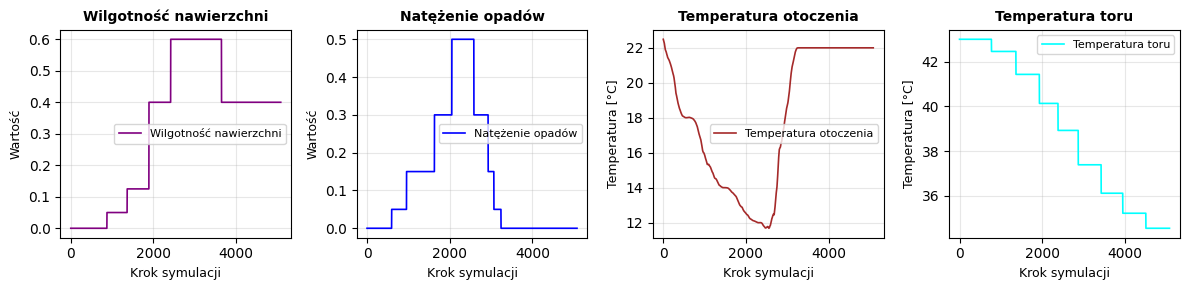

In [6]:
for race in data:
    make_plots_weather(race)